In [160]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import zipfile

!pip install plotly
import plotly.express as px

!pip install dataprep
from dataprep.eda import create_report

!pip install h2o
import h2o
from h2o.automl import H2OAutoML

In [161]:
cancer_df1 = pd.read_csv("Second_Case.csv")

In [162]:
cancer_df1.head(10)

/usr/local/lib/python3.10/dist-packages/google/colab/_interactive_table_hint_button.py:178: FutureWarning: Index.format is deprecated and will be removed in a future version. Convert using index.astype(str) or index.map(formatter) instead.
  df_html=dataframe._repr_html_(),  # pylint: disable=protected-access
/usr/local/lib/python3.10/dist-packages/google/colab/_interactive_table_hint_button.py:178: FutureWarning: RangeIndex.format is deprecated and will be removed in a future version. Convert using index.astype(str) or index.map(formatter) instead.
  df_html=dataframe._repr_html_(),  # pylint: disable=protected-access


behavior_sexualRisk  behavior_eating  behavior_personalHygine   
0                   10               13                       12  \
1                   10               11                       11   
2                   10               15                        3   
3                   10               11                       10   
4                    8               11                        7   
5                   10               14                        8   
6                   10               15                        4   
7                    8               12                        9   
8                   10               15                        7   
9                    7               15                        7   

   intention_aggregation  intention_commitment  attitude_consistency   
0                      4                     7                     9  \
1                     10                    14                     7   
2                      2                    14                     8   
3                     10                    15                     7   
4                      8                    10                     7   
5                      6                    15                     8   
6                      6                    14                     6   
7                     10                    10                     5   
8                      2                    15                     6   
9                      6                    11                     8   

   attitude_spontaneity  norm_significantPerson  norm_fulfillment   
0                    10                       1                 8  \
1                     7                       5                 5   
2                    10                       1                 4   
3                     7                       1                 5   
4                     8                       1                 5   
5                    10                       1                 3   
6                    10                       5                 3   
7                    10                       5                 5   
8                    10                       1                 3   
9                     8                       5                 3   

   perception_vulnerability  perception_severity  motivation_strength   
0                         7                    3                   14  \
1                         4                    2                   15   
2                         7                    2                    7   
3                         4                    2                   15   
4                         3                    2                   15   
5                         4                    2                   14   
6                         7                    2                    7   
7                         5                    2                   10   
8                         5                    2                    9   
9                         3                    4                   15   

   motivation_willingness  socialSupport_emotionality   
0                       8                           5  \
1                      13                           7   
2                       3                           3   
3                      13                           7   
4                       5                           3   
5                       8                           7   
6                      13                           3   
7                       9                          13   
8                      15                          13   
9                       3                           8   

   socialSupport_appreciation  socialSupport_instrumental   
0                           7                          12  \
1                           6                           5   
2                           6                          11   
3                        

In [163]:
cancer_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72 entries, 0 to 71
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   behavior_sexualRisk         72 non-null     int64
 1   behavior_eating             72 non-null     int64
 2   behavior_personalHygine     72 non-null     int64
 3   intention_aggregation       72 non-null     int64
 4   intention_commitment        72 non-null     int64
 5   attitude_consistency        72 non-null     int64
 6   attitude_spontaneity        72 non-null     int64
 7   norm_significantPerson      72 non-null     int64
 8   norm_fulfillment            72 non-null     int64
 9   perception_vulnerability    72 non-null     int64
 10  perception_severity         72 non-null     int64
 11  motivation_strength         72 non-null     int64
 12  motivation_willingness      72 non-null     int64
 13  socialSupport_emotionality  72 non-null     int64
 14  socialSuppor

In [164]:
cancer_df1.describe()

/usr/local/lib/python3.10/dist-packages/google/colab/_interactive_table_hint_button.py:178: FutureWarning: Index.format is deprecated and will be removed in a future version. Convert using index.astype(str) or index.map(formatter) instead.
  df_html=dataframe._repr_html_(),  # pylint: disable=protected-access


behavior_sexualRisk  behavior_eating  behavior_personalHygine   
count            72.000000        72.000000                72.000000  \
mean              9.666667        12.791667                11.083333   
std               1.186782         2.361293                 3.033847   
min               2.000000         3.000000                 3.000000   
25%              10.000000        11.000000                 9.000000   
50%              10.000000        13.000000                11.000000   
75%              10.000000        15.000000                14.000000   
max              10.000000        15.000000                15.000000   

       intention_aggregation  intention_commitment  attitude_consistency   
count              72.000000             72.000000             72.000000  \
mean                7.902778             13.347222              7.180556   
std                 2.738148              2.374511              1.522844   
min                 2.000000              6.000000              2.000000   
25%                 6.000000             11.000000              6.000000   
50%                10.000000             15.000000              7.000000   
75%                10.000000             15.000000              8.000000   
max                10.000000             15.000000             10.000000   

       attitude_spontaneity  norm_significantPerson  norm_fulfillment   
count             72.000000               72.000000         72.000000  \
mean               8.611111                3.125000          8.486111   
std                1.515698                1.845722          4.907577   
min                4.000000                1.000000          3.000000   
25%                8.000000                1.000000          3.000000   
50%                9.000000                3.000000          7.000000   
75%               10.000000                5.000000         14.000000   
max               10.000000                5.000000         15.000000   

       perception_vulnerability  perception_severity  motivation_strength   
count                 72.000000            72.000000            72.000000  \
mean                   8.513889             5.388889            12.652778   
std                    4.275686             3.400727             3.207209   
min                    3.000000             2.000000             3.000000   
25%                    5.000000             2.000000            11.000000   
50%                    8.000000             4.000000            14.000000   
75%                   13.000000             9.000000            15.000000   
max                   15.000000            10.000000            15.000000   

       motivation_willingness  socialSupport_emotionality   
count               72.000000                   72.000000  \
mean                 9.694444                    8.097222   
std                  4.130406                    4.243171   
min                  3.000000                    3.000000   
25%                  7.000000                    3.000000   
50%                 11.000000                    9.000000   
75%                 13.000000                   11.250000   
max                 15.000000                   15.000000   

       socialSupport_appreciation  socialSupport_instrumental   
count                   72.000000                   72.000000  \
mean                     6.166667                   10.375000   
std                      2.897303                    4.316485   
min                      2.000000                    3.000000   
25%                      3.750000                    6.750000   
50%                      6.500000                   12.000000   
75%                      9.000000                   14.250000   
max                     10.000000                   15.000000   

       empowerment_knowledge  empowerment_abilities  empowerment_desires   
count              72.000000              72.000000            72.000000  \
mean               10.541667     

In [165]:
cancer_df1 = cancer_df1.replace('?', np.nan)
cancer_df1

/usr/local/lib/python3.10/dist-packages/google/colab/_interactive_table_hint_button.py:178: FutureWarning: Index.format is deprecated and will be removed in a future version. Convert using index.astype(str) or index.map(formatter) instead.
  df_html=dataframe._repr_html_(),  # pylint: disable=protected-access


behavior_sexualRisk  behavior_eating  behavior_personalHygine   
0                    10               13                       12  \
1                    10               11                       11   
2                    10               15                        3   
3                    10               11                       10   
4                     8               11                        7   
..                  ...              ...                      ...   
67                   10               14                       14   
68                   10               12                       15   
69                   10                8                       11   
70                    9               12                       13   
71                   10               14                       14   

    intention_aggregation  intention_commitment  attitude_consistency   
0                       4                     7                     9  \
1                      10                    14                     7   
2                       2                    14                     8   
3                      10                    15                     7   
4                       8                    10                     7   
..                    ...                   ...                   ...   
67                     10                    15                     6   
68                     10                    15                     8   
69                      6                    10                     6   
70                     10                    13                     6   
71                      6                    12                     7   

    attitude_spontaneity  norm_significantPerson  norm_fulfillment   
0                     10                       1                 8  \
1                      7                       5                 5   
2                     10                       1                 4   
3                      7                       1                 5   
4                      8                       1                 5   
..                   ...                     ...               ...   
67                     7                       5                15   
68                     8                       5                15   
69                     4                       3                13   
70                     6                       5                14   
71                     8                       5                15   

    perception_vulnerability  perception_severity  motivation_strength   
0                          7                    3                   14  \
1                          4                    2                   15   
2                          7                    2                    7   
3                          4                    2                   15   
4                          3                    2                   15   
..                       ...                  ...                  ...   
67                        14                   10                   15   
68                        14                    8                   12   
69                         9                    8                   14   
70                        13                   10                   13   
71                        12                   10                   10   

    motivation_willingness  socialSupport_emotionality   
0                        8                           5  \
1                       13                           7   
2                        3                           3   
3                       13                           7   
4                        5                           3   
..                     ...                         ...   
67                      13                           9   
68                      14                          11   
69                      12                    

In [166]:
cancer_df1.isnull().sum()

/usr/local/lib/python3.10/dist-packages/google/colab/_reprs.py:217: FutureWarning: RangeIndex.format is deprecated and will be removed in a future version. Convert using index.astype(str) or index.map(formatter) instead.
  series_as_table_html = series.to_frame()._repr_html_()  # pylint: disable=protected-access
/usr/local/lib/python3.10/dist-packages/google/colab/_reprs.py:217: FutureWarning: Index.format is deprecated and will be removed in a future version. Convert using index.astype(str) or index.map(formatter) instead.
  series_as_table_html = series.to_frame()._repr_html_()  # pylint: disable=protected-access


behavior_sexualRisk           0
behavior_eating               0
behavior_personalHygine       0
intention_aggregation         0
intention_commitment          0
attitude_consistency          0
attitude_spontaneity          0
norm_significantPerson        0
norm_fulfillment              0
perception_vulnerability      0
perception_severity           0
motivation_strength           0
motivation_willingness        0
socialSupport_emotionality    0
socialSupport_appreciation    0
socialSupport_instrumental    0
empowerment_knowledge         0
empowerment_abilities         0
empowerment_desires           0
ca_cervix                     0
dtype: int64

<Axes: >

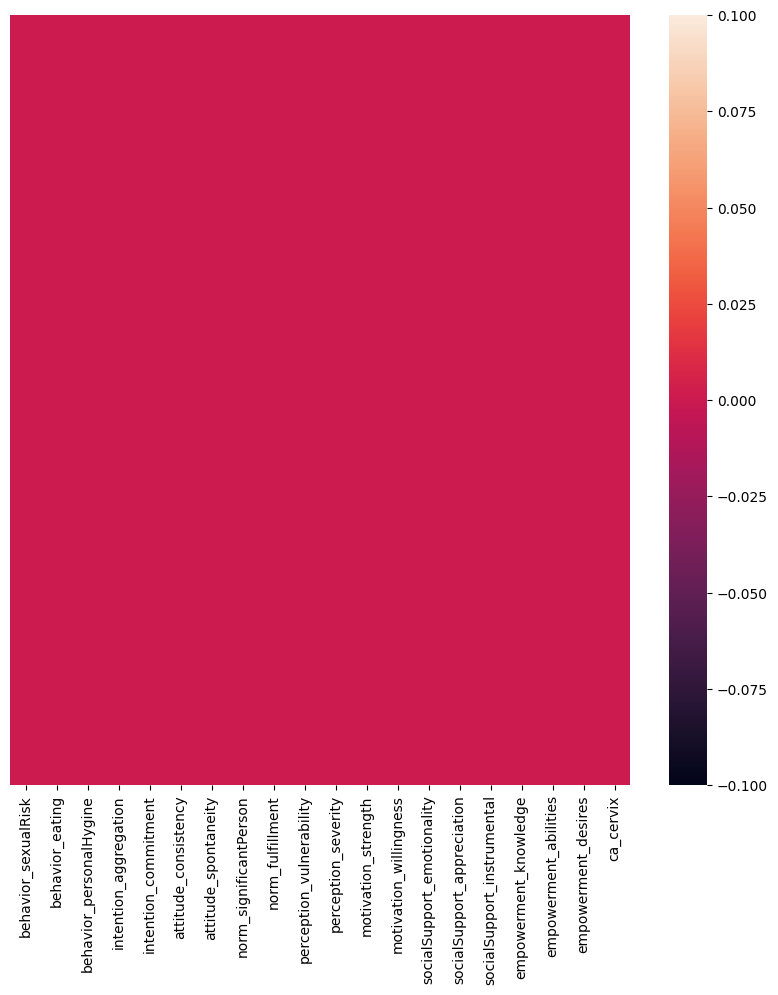

In [167]:
plt.figure(figsize = (10, 10))
sns.heatmap(cancer_df1.isnull(), yticklabels=False)

In [168]:
cancer_df1 = cancer_df1.apply(pd.to_numeric)
cancer_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72 entries, 0 to 71
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   behavior_sexualRisk         72 non-null     int64
 1   behavior_eating             72 non-null     int64
 2   behavior_personalHygine     72 non-null     int64
 3   intention_aggregation       72 non-null     int64
 4   intention_commitment        72 non-null     int64
 5   attitude_consistency        72 non-null     int64
 6   attitude_spontaneity        72 non-null     int64
 7   norm_significantPerson      72 non-null     int64
 8   norm_fulfillment            72 non-null     int64
 9   perception_vulnerability    72 non-null     int64
 10  perception_severity         72 non-null     int64
 11  motivation_strength         72 non-null     int64
 12  motivation_willingness      72 non-null     int64
 13  socialSupport_emotionality  72 non-null     int64
 14  socialSuppor

In [169]:
cancer_df1.describe()

/usr/local/lib/python3.10/dist-packages/google/colab/_interactive_table_hint_button.py:178: FutureWarning: Index.format is deprecated and will be removed in a future version. Convert using index.astype(str) or index.map(formatter) instead.
  df_html=dataframe._repr_html_(),  # pylint: disable=protected-access


behavior_sexualRisk  behavior_eating  behavior_personalHygine   
count            72.000000        72.000000                72.000000  \
mean              9.666667        12.791667                11.083333   
std               1.186782         2.361293                 3.033847   
min               2.000000         3.000000                 3.000000   
25%              10.000000        11.000000                 9.000000   
50%              10.000000        13.000000                11.000000   
75%              10.000000        15.000000                14.000000   
max              10.000000        15.000000                15.000000   

       intention_aggregation  intention_commitment  attitude_consistency   
count              72.000000             72.000000             72.000000  \
mean                7.902778             13.347222              7.180556   
std                 2.738148              2.374511              1.522844   
min                 2.000000              6.000000              2.000000   
25%                 6.000000             11.000000              6.000000   
50%                10.000000             15.000000              7.000000   
75%                10.000000             15.000000              8.000000   
max                10.000000             15.000000             10.000000   

       attitude_spontaneity  norm_significantPerson  norm_fulfillment   
count             72.000000               72.000000         72.000000  \
mean               8.611111                3.125000          8.486111   
std                1.515698                1.845722          4.907577   
min                4.000000                1.000000          3.000000   
25%                8.000000                1.000000          3.000000   
50%                9.000000                3.000000          7.000000   
75%               10.000000                5.000000         14.000000   
max               10.000000                5.000000         15.000000   

       perception_vulnerability  perception_severity  motivation_strength   
count                 72.000000            72.000000            72.000000  \
mean                   8.513889             5.388889            12.652778   
std                    4.275686             3.400727             3.207209   
min                    3.000000             2.000000             3.000000   
25%                    5.000000             2.000000            11.000000   
50%                    8.000000             4.000000            14.000000   
75%                   13.000000             9.000000            15.000000   
max                   15.000000            10.000000            15.000000   

       motivation_willingness  socialSupport_emotionality   
count               72.000000                   72.000000  \
mean                 9.694444                    8.097222   
std                  4.130406                    4.243171   
min                  3.000000                    3.000000   
25%                  7.000000                    3.000000   
50%                 11.000000                    9.000000   
75%                 13.000000                   11.250000   
max                 15.000000                   15.000000   

       socialSupport_appreciation  socialSupport_instrumental   
count                   72.000000                   72.000000  \
mean                     6.166667                   10.375000   
std                      2.897303                    4.316485   
min                      2.000000                    3.000000   
25%                      3.750000                    6.750000   
50%                      6.500000                   12.000000   
75%                      9.000000                   14.250000   
max                     10.000000                   15.000000   

       empowerment_knowledge  empowerment_abilities  empowerment_desires   
count              72.000000              72.000000            72.000000  \
mean               10.541667     

In [170]:
cancer_df1.mean()

/usr/local/lib/python3.10/dist-packages/google/colab/_reprs.py:217: FutureWarning: RangeIndex.format is deprecated and will be removed in a future version. Convert using index.astype(str) or index.map(formatter) instead.
  series_as_table_html = series.to_frame()._repr_html_()  # pylint: disable=protected-access
/usr/local/lib/python3.10/dist-packages/google/colab/_reprs.py:217: FutureWarning: Index.format is deprecated and will be removed in a future version. Convert using index.astype(str) or index.map(formatter) instead.
  series_as_table_html = series.to_frame()._repr_html_()  # pylint: disable=protected-access


behavior_sexualRisk            9.666667
behavior_eating               12.791667
behavior_personalHygine       11.083333
intention_aggregation          7.902778
intention_commitment          13.347222
attitude_consistency           7.180556
attitude_spontaneity           8.611111
norm_significantPerson         3.125000
norm_fulfillment               8.486111
perception_vulnerability       8.513889
perception_severity            5.388889
motivation_strength           12.652778
motivation_willingness         9.694444
socialSupport_emotionality     8.097222
socialSupport_appreciation     6.166667
socialSupport_instrumental    10.375000
empowerment_knowledge         10.541667
empowerment_abilities          9.319444
empowerment_desires           10.277778
ca_cervix                      0.291667
dtype: float64

In [171]:
cancer_df1 = cancer_df1.fillna(round(cancer_df1.mean()))
cancer_df1.head()

/usr/local/lib/python3.10/dist-packages/google/colab/_interactive_table_hint_button.py:178: FutureWarning: Index.format is deprecated and will be removed in a future version. Convert using index.astype(str) or index.map(formatter) instead.
  df_html=dataframe._repr_html_(),  # pylint: disable=protected-access
/usr/local/lib/python3.10/dist-packages/google/colab/_interactive_table_hint_button.py:178: FutureWarning: RangeIndex.format is deprecated and will be removed in a future version. Convert using index.astype(str) or index.map(formatter) instead.
  df_html=dataframe._repr_html_(),  # pylint: disable=protected-access


behavior_sexualRisk  behavior_eating  behavior_personalHygine   
0                   10               13                       12  \
1                   10               11                       11   
2                   10               15                        3   
3                   10               11                       10   
4                    8               11                        7   

   intention_aggregation  intention_commitment  attitude_consistency   
0                      4                     7                     9  \
1                     10                    14                     7   
2                      2                    14                     8   
3                     10                    15                     7   
4                      8                    10                     7   

   attitude_spontaneity  norm_significantPerson  norm_fulfillment   
0                    10                       1                 8  \
1                     7                       5                 5   
2                    10                       1                 4   
3                     7                       1                 5   
4                     8                       1                 5   

   perception_vulnerability  perception_severity  motivation_strength   
0                         7                    3                   14  \
1                         4                    2                   15   
2                         7                    2                    7   
3                         4                    2                   15   
4                         3                    2                   15   

   motivation_willingness  socialSupport_emotionality   
0                       8                           5  \
1                      13                           7   
2                       3                           3   
3                      13                           7   
4                       5                           3   

   socialSupport_appreciation  socialSupport_instrumental   
0                           7                          12  \
1                           6                           5   
2                           6                          11   
3                           4                           4   
4                           6                          12   

   empowerment_knowledge  empowerment_abilities  empowerment_desires   
0                     12                     11                    8  \
1                      5                      4                    4   
2                      3                      3                   15   
3                      4                      4                    4   
4                      5                      4                    7   

   ca_cervix  
0          1  
1          1  
2          1  
3          1  
4          1

In [172]:
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321. connected.


--------------------------  -----------------------------------------------------------------------------------------
H2O_cluster_uptime:         1 hour 1 min
H2O_cluster_timezone:       Etc/UTC
H2O_data_parsing_timezone:  UTC
H2O_cluster_version:        3.46.0.6
H2O_cluster_version_age:    26 days
H2O_cluster_name:           H2O_from_python_unknownUser_077fcb
H2O_cluster_total_nodes:    1
H2O_cluster_free_memory:    3.152 Gb
H2O_cluster_total_cores:    2
H2O_cluster_allowed_cores:  2
H2O_cluster_status:         locked, healthy
H2O_connection_url:         http://localhost:54321
H2O_connection_proxy:       {"http": null, "https": null, "colab_language_server": "/usr/colab/bin/language_service"}
H2O_internal_security:      False
Python_version:             3.10.12 final
--------------------------  -----------------------------------------------------------------------------------------

In [173]:
h2o_df = h2o.H2OFrame(cancer_df1)

h2o_df

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


behavior_sexualRisk    behavior_eating    behavior_personalHygine    intention_aggregation    intention_commitment    attitude_consistency    attitude_spontaneity    norm_significantPerson    norm_fulfillment    perception_vulnerability    perception_severity    motivation_strength    motivation_willingness    socialSupport_emotionality    socialSupport_appreciation    socialSupport_instrumental    empowerment_knowledge    empowerment_abilities    empowerment_desires    ca_cervix
---------------------  -----------------  -------------------------  -----------------------  ----------------------  ----------------------  ----------------------  ------------------------  ------------------  --------------------------  ---------------------  ---------------------  ------------------------  ----------------------------  ----------------------------  ----------------------------  -----------------------  -----------------------  ---------------------  -----------
                   10                 13                         12                        4                       7                       9                      10                         1                   8                           7                      3                     14                         8                             5                             7                            12                       12                       11                      8            1
                   10                 11                         11                       10                      14                       7                       7                         5                   5                           4                      2                     15                        13                             7                             6                             5                        5                        4                      4            1
                   10                 15                          3                        2                      14                       8                      10                         1                   4                           7                      2                      7                         3                             3                             6                            11                        3                        3                     15            1
                   10                 11                         10                       10                      15                       7                       7                         1                   5                           4                      2                     15                        13                             7                             4                             4                        4                        4                      4            1
                    8                 11                          7                        8                      10                       7                       8                         1                   5                           3                      2                     15                         5                             3                             6                            12                        5                        4                      7            1
                   10                 14                          8                        6                      15                       8                      10                         1                   3                           4                      2                     14                         8                             7                             2                             7                       13                        9                      6            1
                   10                 15                          4                        6              

In [174]:
h2o_df.describe()

Rows:72
Cols:20

behavior_sexualRisk    behavior_eating     behavior_personalHygine    intention_aggregation    intention_commitment    attitude_consistency    attitude_spontaneity    norm_significantPerson    norm_fulfillment    perception_vulnerability    perception_severity    motivation_strength    motivation_willingness    socialSupport_emotionality    socialSupport_appreciation    socialSupport_instrumental    empowerment_knowledge    empowerment_abilities    empowerment_desires    ca_cervix
-------  ---------------------  ------------------  -------------------------  -----------------------  ----------------------  ----------------------  ----------------------  ------------------------  ------------------  --------------------------  ---------------------  ---------------------  ------------------------  ----------------------------  ----------------------------  ----------------------------  -----------------------  -----------------------  ---------------------  ------------------
type     int                    int                 int                        int                      int                     int                     int                     int                       int                 int                         int                    int                    int                       int                           int                           int                           int                      int                      int                    int
mins     2.0                    3.0                 3.0                        2.0                      6.0                     2.0                     4.0                     1.0                       3.0                 3.0                         2.0                    3.0                    3.0                       3.0                           2.0                           3.0                           3.0                      3.0                      3.0                    0.0
mean     9.666666666666668      12.791666666666664  11.083333333333334         7.902777777777779        13.34722222222223       7.1805555555555545      8.611111111111112       3.1249999999999996        8.486111111111114   8.51388888888889            5.388888888888888      12.652777777777777     9.694444444444446         8.097222222222221             6.166666666666665             10.374999999999998            10.541666666666668       9.319444444444443        10.277777777777773     0.2916666666666667
maxs     10.0                   15.0                15.0                       10.0                     15.0                    10.0                    10.0                    5.0                       15.0                15.0                        10.0                   15.0                   15.0                      15.0                          10.0                          15.0                          15.0                     15.0                     15.0                   1.0
sigma    1.1867816581938528     2.361292913924935   3.0338466263330903         2.7381484554359465       2.3745109042556094      1.5228437898017364      1.5156977248495955      1.8457221190756403        4.907576940211956   4.275686438771171           3.4007271614931214     3.2072089670572543     4.130405596456153         4.243170891859929             2.8973032628951882            4.316484941885135             4.366767909086878        4.181873658139944        4.482272506570879      0.4577193924813773
zeros    0                      0                   0                          0                        0                       0                       0                       0                         0                   0                           0                      0                      0                         0                             0                             0                             0                        0                        0                      51
missing  0                      0              

In [175]:
train, test = h2o_df.split_frame(ratios=[0.75], seed=121)

In [176]:
X = train.columns
y = 'ca_cervix'
X.remove(y)

In [177]:
train[y] = train[y].asfactor()
test[y] = test[y].asfactor()

In [178]:
X

['behavior_sexualRisk',
 'behavior_eating',
 'behavior_personalHygine',
 'intention_aggregation',
 'intention_commitment',
 'attitude_consistency',
 'attitude_spontaneity',
 'norm_significantPerson',
 'norm_fulfillment',
 'perception_vulnerability',
 'perception_severity',
 'motivation_strength',
 'motivation_willingness',
 'socialSupport_emotionality',
 'socialSupport_appreciation',
 'socialSupport_instrumental',
 'empowerment_knowledge',
 'empowerment_abilities',
 'empowerment_desires']

In [179]:
y

'ca_cervix'

In [180]:
aml = H2OAutoML(balance_classes=True,
                stopping_metric='AUC',
                seed=121,
                max_models=20,
                exclude_algos = ["StackedEnsemble"])

aml.train(x=X,
          y=y,
          training_frame=train)

AutoML progress: |█
19:44:20.957: _min_rows param, The dataset size is too small to split for min_rows=100.0: must have at least 200.0 (weighted) rows, but have only 53.0.

██████████████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2ODeepLearningEstimator : Deep Learning
Model Key: DeepLearning_grid_1_AutoML_4_20241128_194417_model_1


Status of Neuron Layers: predicting ca_cervix, 2-class classification, bernoulli distribution, CrossEntropy loss, 2,202 weights/biases, 32.6 KB, 770 training samples, mini-batch size 1
    layer    units    type              dropout    l1    l2    mean_rate              rate_rms               momentum    mean_weight            weight_rms           mean_bias               bias_rms
--  -------  -------  ----------------  ---------  ----  ----  ---------------------  ---------------------  ----------  ---------------------  -------------------  ----------------------  -------------------
    1        19       Input             5.0
    2        100      RectifierDropout  20.0       0.0   0.0   0.007450750846228881   0.016430392861366272   0.0         0.0029563651508942713  0.12755775451660156  0.49894221229855007     0.03538845479488373
    3        2        Softmax                      0.0   0.0   0.0018073082051705569  0.0004385566571727395  0.0         0.026343312084209175   0.5547835826873779   1.3877787807814457e-17  0.06493303179740906

ModelMetricsBinomial: deeplearning
** Reported on train data. **

MSE: 0.019168047977618785
RMSE: 0.1384487196676762
LogLoss: 0.06917708427167127
Mean Per-Class Error: 0.0
AUC: 1.0
AUCPR: 1.0
Gini: 1.0

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.9645600517741206
       0    1    Error    Rate
-----  ---  ---  -------  ----------
0      38   0    0        (0.0/38.0)
1      0    39   0        (0.0/39.0)
Total  38   39   0        (0.0/77.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.96456      1         14
max f2                       0.96456      1         14
max f0point5                 0.96456      1         14
max accuracy                 0.96456      1         14
max precision                1            1         0
max recall                   0.96456      1         14
max specificity              1            1         0
max absolute_mcc             0.96456      1         14
max min_per_class_accuracy   0.96456      1         14
max mean_per_class_accuracy  0.96456      1         14
max tns                      1            38        0
max fns                      1            36        0
max fps                      1.35051e-07  38        52
max tps                      0.96456      39        14
max tnr                      1            1         0
max fnr                      1            0.923077  0
max fpr                      1.35051e-07  1         52
max tpr                      0.96456      1         14

Gains/Lift Table: Avg response rate: 50.65 %, avg score: 54.78 %
group    cumulative_data_fraction    lower_threshold    lift     cumulative_lift    response_rate    score        cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain     cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  -------  -----------------  ---------------  -----------  --------------------------  ------------------  --------------  -------------------------  -------  -----------------  --------------------
1        0.038961                    1                  1.97436  1.97436            1                1            1                           1                   0.0769231       0.0769231                  97.4359  97.4359            0.0769231
2        0.038961                    0.999985           0        1.97436            0                0            1                           1                   0               0.0769231                  -100     97.4359            0.0769231
3        0.0649351                   0.999945           1.97436  1.97436            1                0.999945     1                    

In [181]:
lb = aml.leaderboard
lb.head(rows=lb.nrows)

model_id                                                   auc    logloss     aucpr    mean_per_class_error      rmse        mse
----------------------------------------------------  --------  ---------  --------  ----------------------  --------  ---------
DeepLearning_grid_1_AutoML_4_20241128_194417_model_1  0.973684   0.28424   0.931051               0.0798246  0.244623  0.0598406
GBM_2_AutoML_4_20241128_194417                        0.950877   0.304082  0.920753               0.113158   0.301505  0.0909053
DeepLearning_grid_3_AutoML_4_20241128_194417_model_1  0.945614   0.979892  0.934841               0.0798246  0.4281    0.18327
GLM_1_AutoML_4_20241128_194417                        0.942105   0.263731  0.886713               0.146491   0.29099   0.0846752
DeepLearning_grid_1_AutoML_4_20241128_194417_model_2  0.938596   0.787219  0.868534               0.139474   0.348555  0.12149
XRT_1_AutoML_4_20241128_194417                        0.937719   0.336632  0.928591               0.1        0.31681   0.100368
GBM_3_AutoML_4_20241128_194417                        0.933333   0.320224  0.894661               0.126316   0.308397  0.0951087
GBM_grid_1_AutoML_4_20241128_194417_model_2           0.929825   0.350968  0.893536               0.146491   0.327317  0.107136
GBM_5_AutoML_4_20241128_194417                        0.924561   0.316755  0.88782                0.126316   0.286951  0.0823407
DeepLearning_grid_2_AutoML_4_20241128_194417_model_1  0.924561   0.833381  0.862141               0.132456   0.386717  0.14955
GBM_4_AutoML_4_20241128_194417                        0.924561   0.341827  0.873258               0.146491   0.321245  0.103198
XGBoost_3_AutoML_4_20241128_194417                    0.913158   0.314397  0.876154               0.113158   0.305152  0.093118
XGBoost_grid_1_AutoML_4_20241128_194417_model_4       0.903509   0.317826  0.859726               0.159649   0.309339  0.0956904
XGBoost_grid_1_AutoML_4_20241128_194417_model_1       0.896491   0.326     0.864946               0.139474   0.308465  0.0951507
DRF_1_AutoML_4_20241128_194417                        0.881579   0.935754  0.896465               0.0798246  0.317921  0.101073
DeepLearning_1_AutoML_4_20241128_194417               0.868421   0.426484  0.757643               0.17807    0.374526  0.14027
XGBoost_2_AutoML_4_20241128_194417                    0.764912   0.586797  0.656812               0.305263   0.44584   0.198773
XGBoost_1_AutoML_4_20241128_194417                    0.515789   0.716     0.293301               0.5        0.511288  0.261416
XGBoost_grid_1_AutoML_4_20241128_194417_model_3       0.515789   0.689339  0.293301               0.5        0.498093  0.248096
XGBoost_grid_1_AutoML_4_20241128_194417_model_2       0.5        0.693147  0.283019               0.5        0.5       0.25
[20 rows x 7 columns]

# Leaderboard

> Leaderboard shows models with their metrics. When provided with H2OAutoML object, the leaderboard shows 5-fold cross-validated metrics by default (depending on the H2OAutoML settings), otherwise it shows metrics computed on the frame. At most 20 models are shown by default.

model_id                                                   auc    logloss     aucpr    mean_per_class_error      rmse        mse    training_time_ms    predict_time_per_row_ms  algo
----------------------------------------------------  --------  ---------  --------  ----------------------  --------  ---------  ------------------  -------------------------  ------------
GLM_1_AutoML_4_20241128_194417                        1          0.1609    1                      0          0.201038  0.0404165                  61                   0.251084  GLM
DeepLearning_grid_2_AutoML_4_20241128_194417_model_1  1          0.351613  1                      0          0.312593  0.0977142                2461                   0.350473  DeepLearning
DeepLearning_grid_3_AutoML_4_20241128_194417_model_1  1          0.583709  1                      0          0.325765  0.106123                 2796                   0.364102  DeepLearning
DeepLearning_grid_1_AutoML_4_20241128_194417_model_2  0.987179   0.981307  0.974308               0.0384615  0.323576  0.104701                 1566                   0.352197  DeepLearning
DeepLearning_grid_1_AutoML_4_20241128_194417_model_1  0.974359   0.297103  0.943921               0.0384615  0.302317  0.0913956                  79                   0.307137  DeepLearning
XGBoost_grid_1_AutoML_4_20241128_194417_model_4       0.974359   0.285371  0.95549                0.0833333  0.296882  0.0881392                 245                   0.249085  XGBoost
DRF_1_AutoML_4_20241128_194417                        0.961538   0.242776  0.906731               0.0384615  0.281397  0.0791842                 134                   0.22393   DRF
GBM_4_AutoML_4_20241128_194417                        0.961538   0.260228  0.906731               0.0384615  0.285855  0.0817131                 130                   0.231492  GBM
GBM_5_AutoML_4_20241128_194417                        0.935897   0.379587  0.866915               0.0769231  0.363987  0.132486                  190                   0.283034  GBM
GBM_2_AutoML_4_20241128_194417                        0.935897   0.301942  0.866915               0.0769231  0.313055  0.0980035                  90                   0.249975  GBM
XRT_1_AutoML_4_20241128_194417                        0.935897   0.281182  0.866915               0.0769231  0.303006  0.0918129                 148                   0.22379   DRF
GBM_3_AutoML_4_20241128_194417                        0.923077   0.285825  0.818968               0.0769231  0.303241  0.091955                  160                   0.223323  GBM
GBM_grid_1_AutoML_4_20241128_194417_model_2           0.923077   0.320019  0.843332               0.0769231  0.315619  0.0996155                  90                   0.354108  GBM
XGBoost_3_AutoML_4_20241128_194417                    0.923077   0.372998  0.818968               0.0769231  0.337527  0.113924                 3691                   0.252451  XGBoost
XGBoost_grid_1_AutoML_4_20241128_194417_model_1       0.910256   0.36032   0.795385               0.0769231  0.320376  0.102641                 1273                   0.261901  XGBoost
DeepLearning_1_AutoML_4_20241128_194417               0.897436   0.523993  0.832001               0.160256   0.421236  0.17744                    75                   0.267521  DeepLearning
XGBoost_2_AutoML_4_20241128_194417                    0.820513   0.555085  0.561203               0.153846   0.428194  0.18335                  2443                   0.221306  XGBoost
XGBoost_grid_1_AutoML_4_20241128_194417_model_2       0.5        0.693147  0.315789               0.5        0.5       0.25                     2428                   0.217644  XGBoost
XGBoost_1_AutoML_4_20241128_194417                    0.5        0.712647  0.315789               0.5        0.509649  0.259742                  612                   0.225084  XGBoost
XGBoost_grid_1_AutoML_4_20241128_194417_model_3       0.5        0.734553  0.315789               0.5        0.520223  0

# Confusion Matrix

> Confusion matrix shows a predicted class vs an actual class.

## DeepLearning_grid_1_AutoML_4_20241128_194417_model_1

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.8908666733576375
       0    1    Error    Rate
-----  ---  ---  -------  ----------
0      12   1    0.0769   (1.0/13.0)
1      0    6    0        (0.0/6.0)
Total  12   7    0.0526   (1.0/19.0)

# Learning Curve Plot

> Learning curve plot shows the loss function/metric dependent on number of iterations or trees for tree-based algorithms. This plot can be useful for determining whether the model overfits.

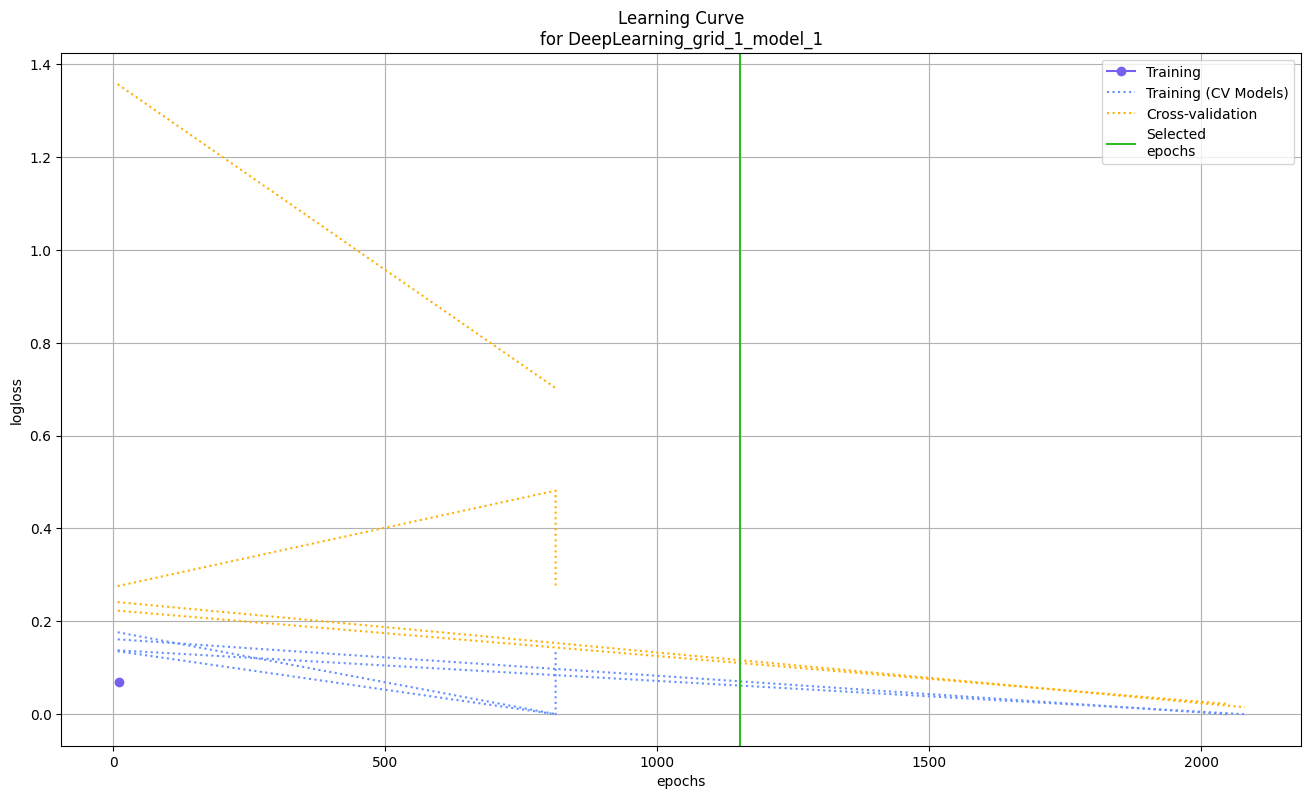

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

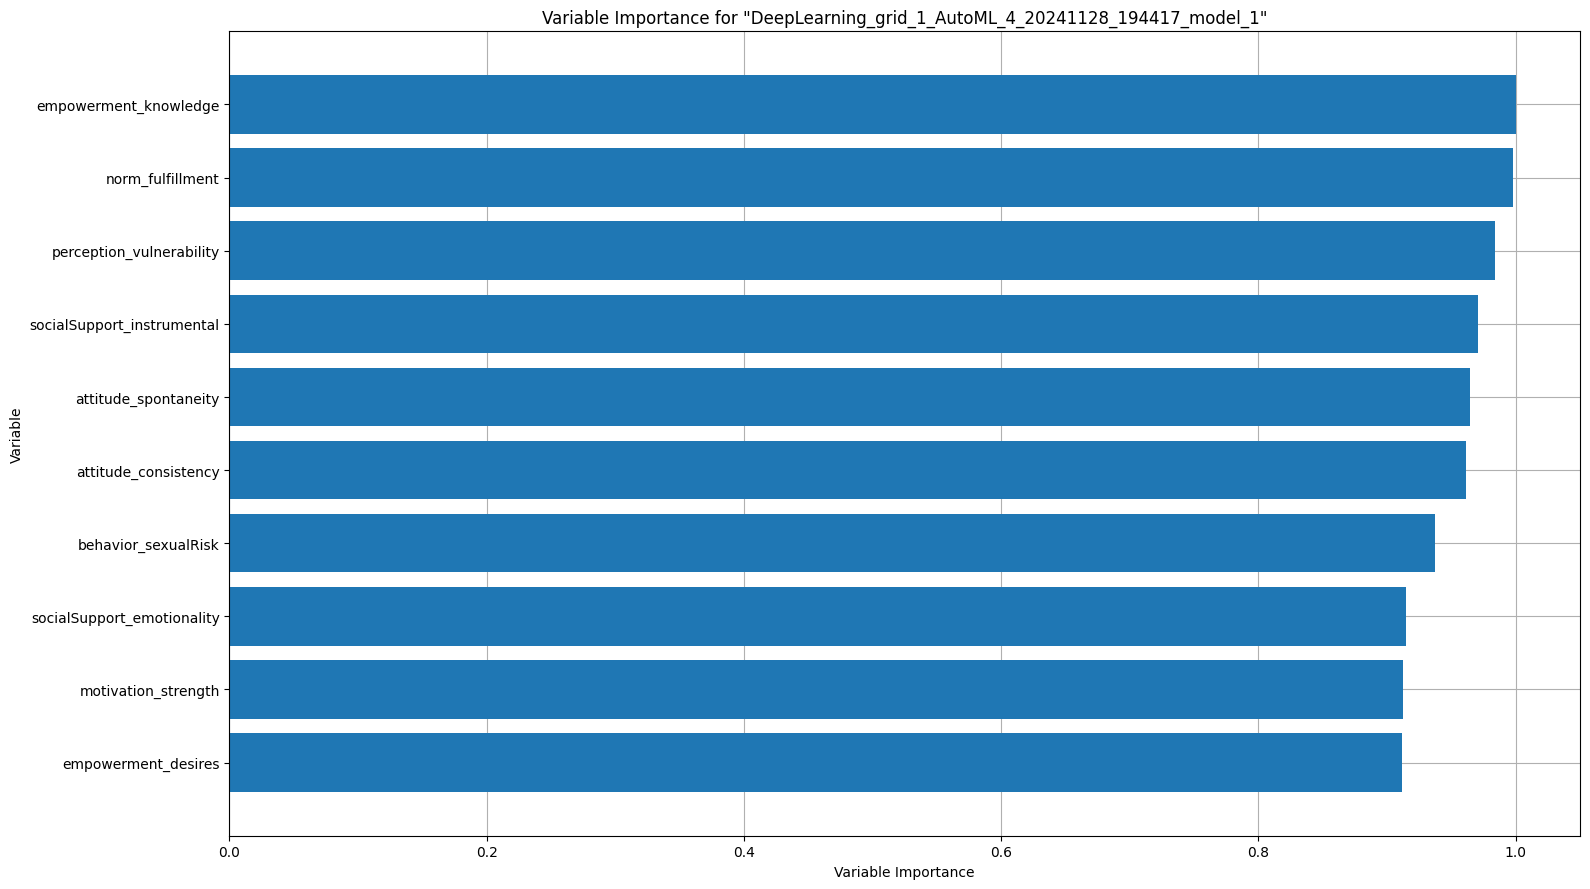

# Variable Importance Heatmap

> Variable importance heatmap shows variable importance across multiple models. Some models in H2O return variable importance for one-hot (binary indicator) encoded versions of categorical columns (e.g. Deep Learning, XGBoost). In order for the variable importance of categorical columns to be compared across all model types we compute a summarization of the the variable importance across all one-hot encoded features and return a single variable importance for the original categorical feature. By default, the models and variables are ordered by their similarity.

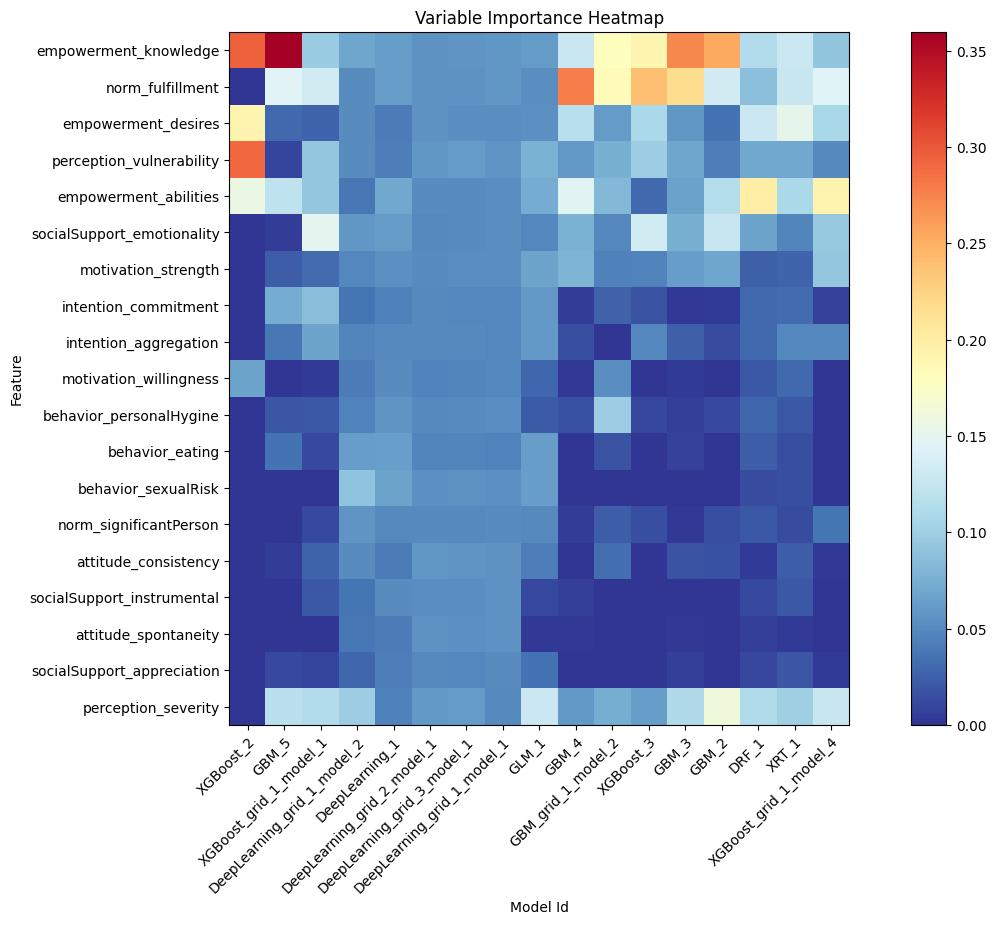

# Model Correlation

> This plot shows the correlation between the predictions of the models. For classification, frequency of identical predictions is used. By default, models are ordered by their similarity (as computed by hierarchical clustering). Interpretable models, such as GAM, GLM, and RuleFit are highlighted using red colored text.

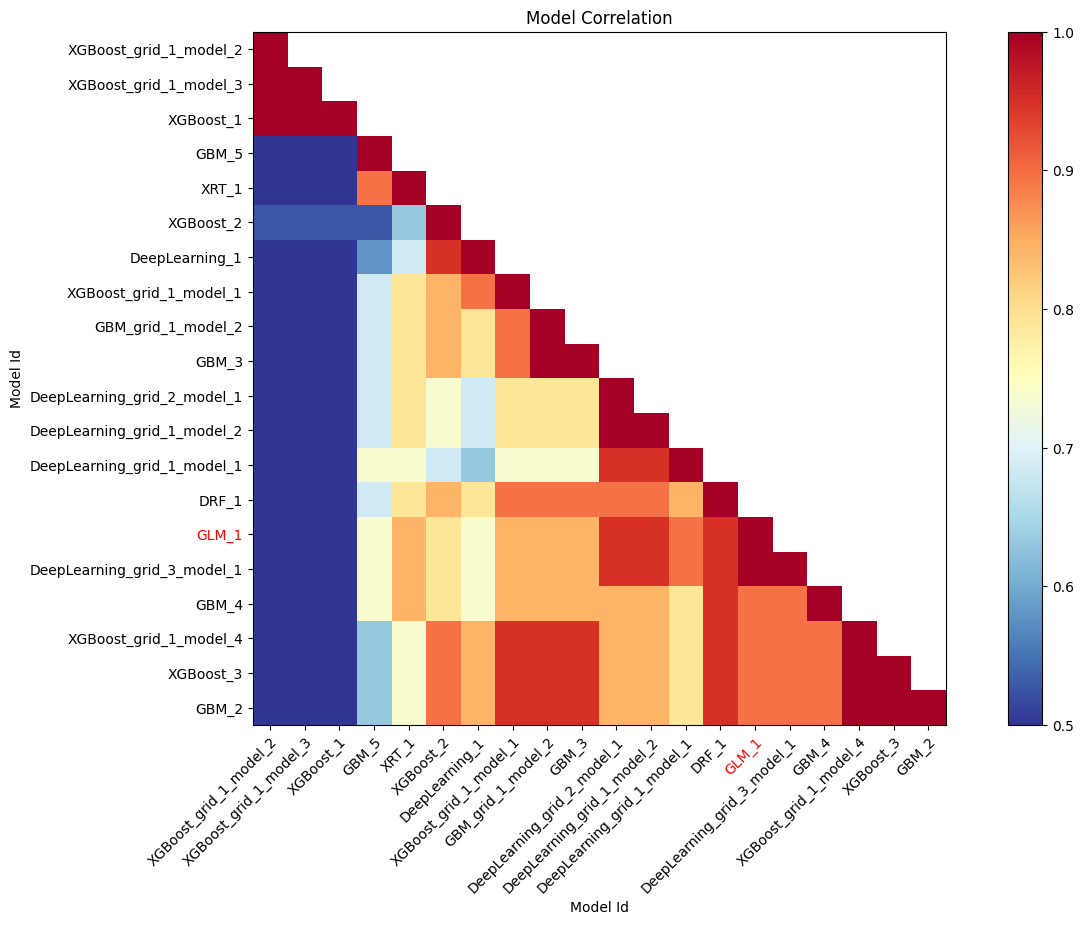

# SHAP Summary

> SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

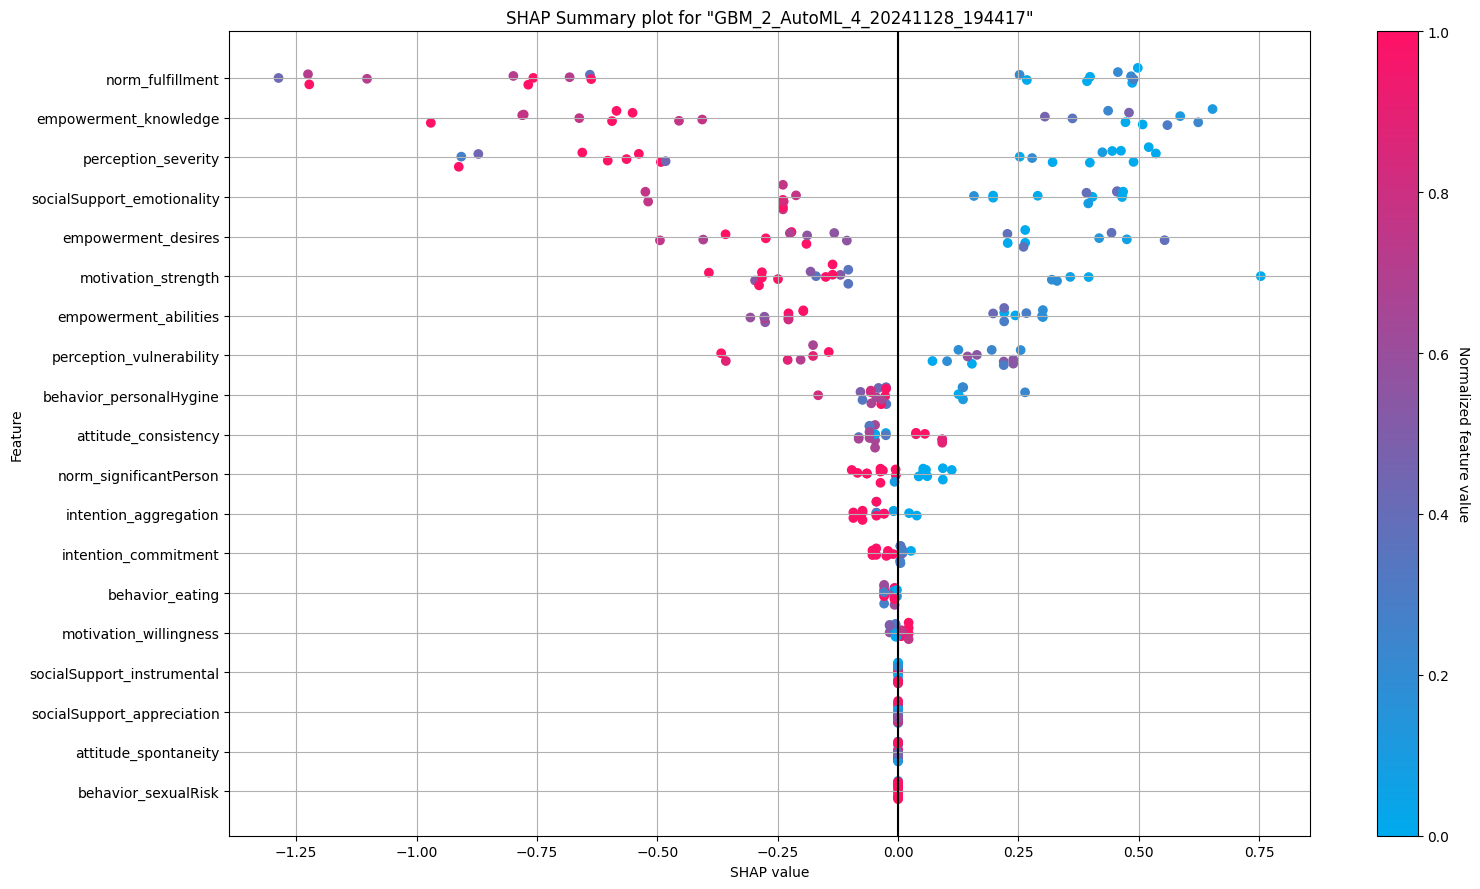

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

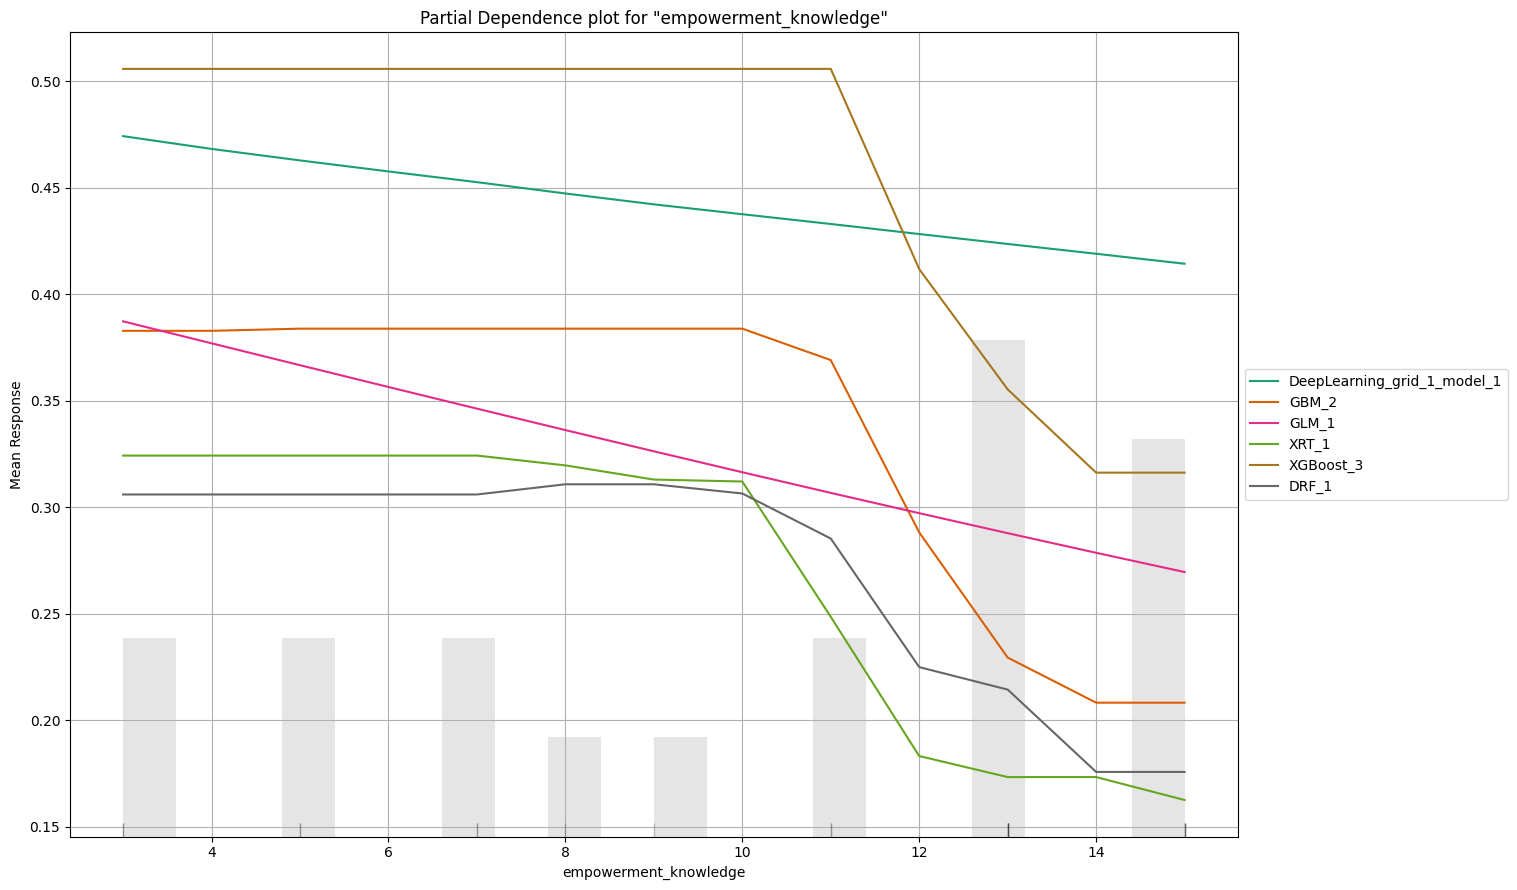

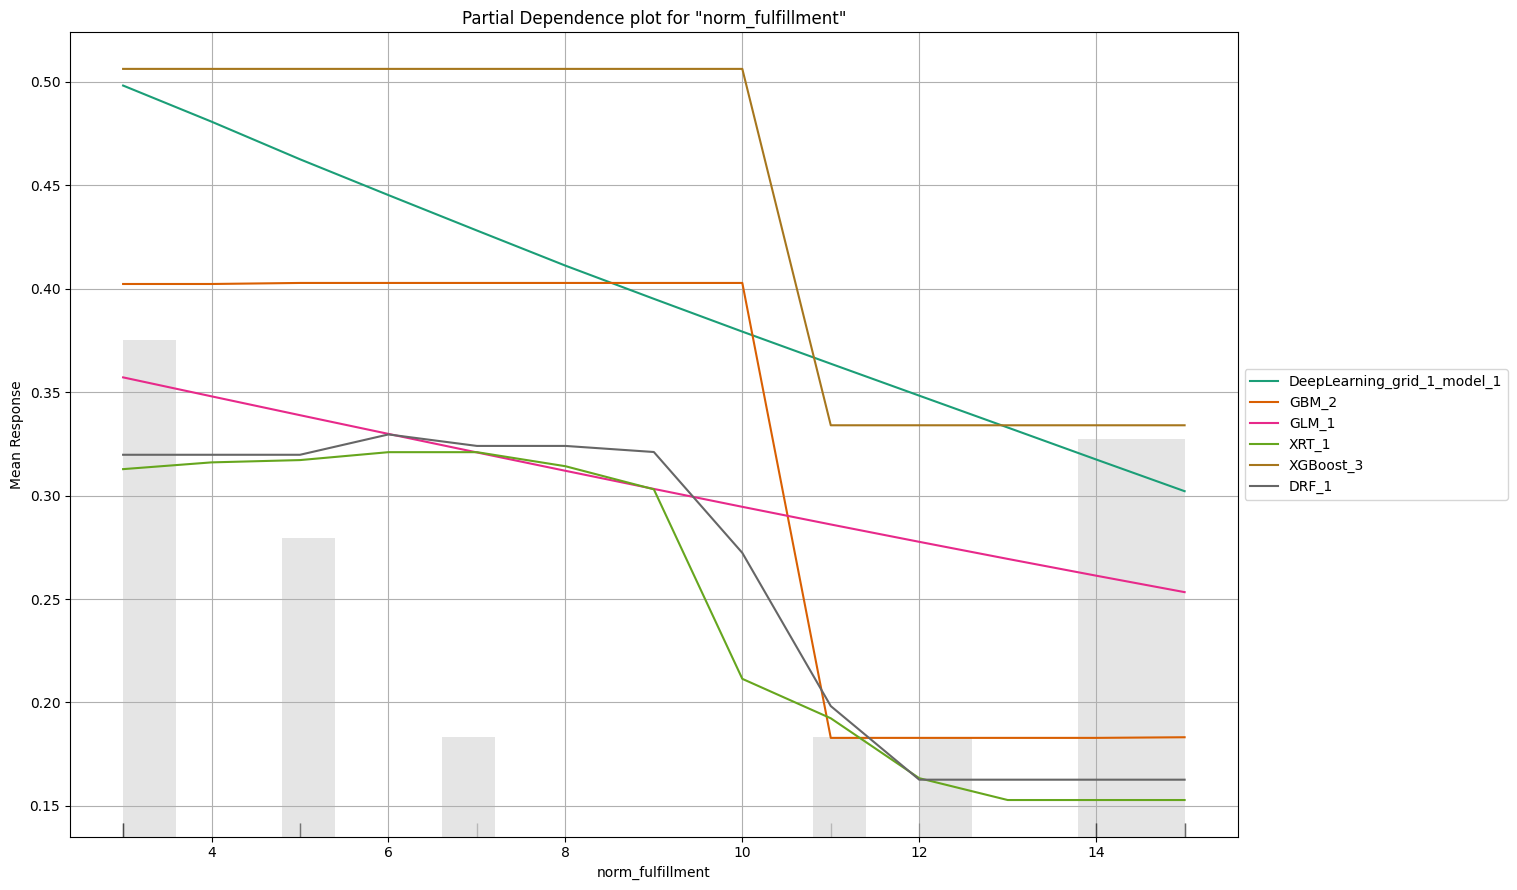

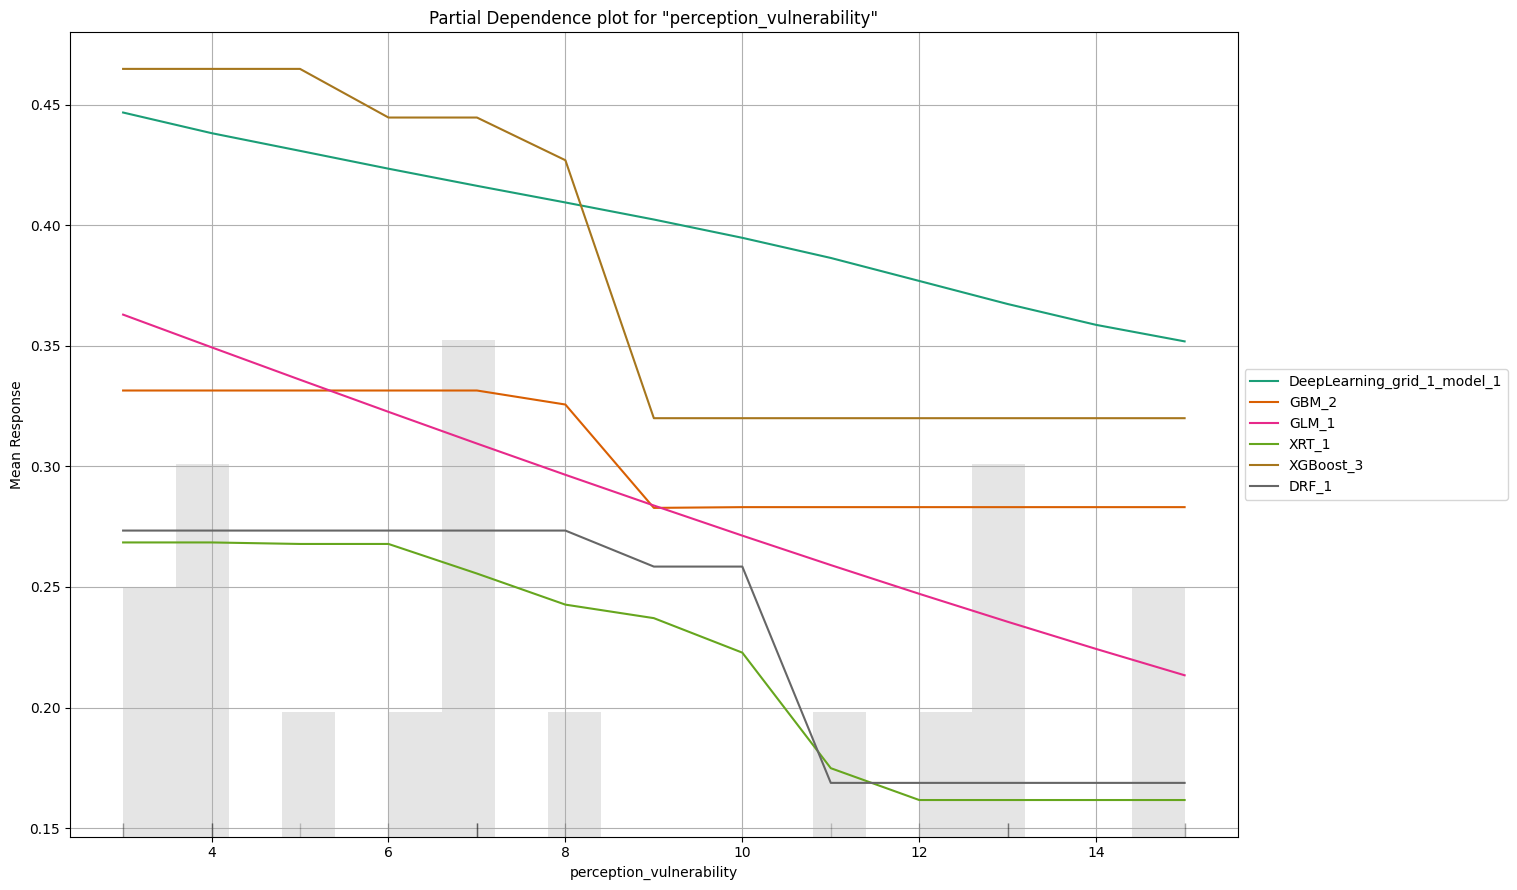

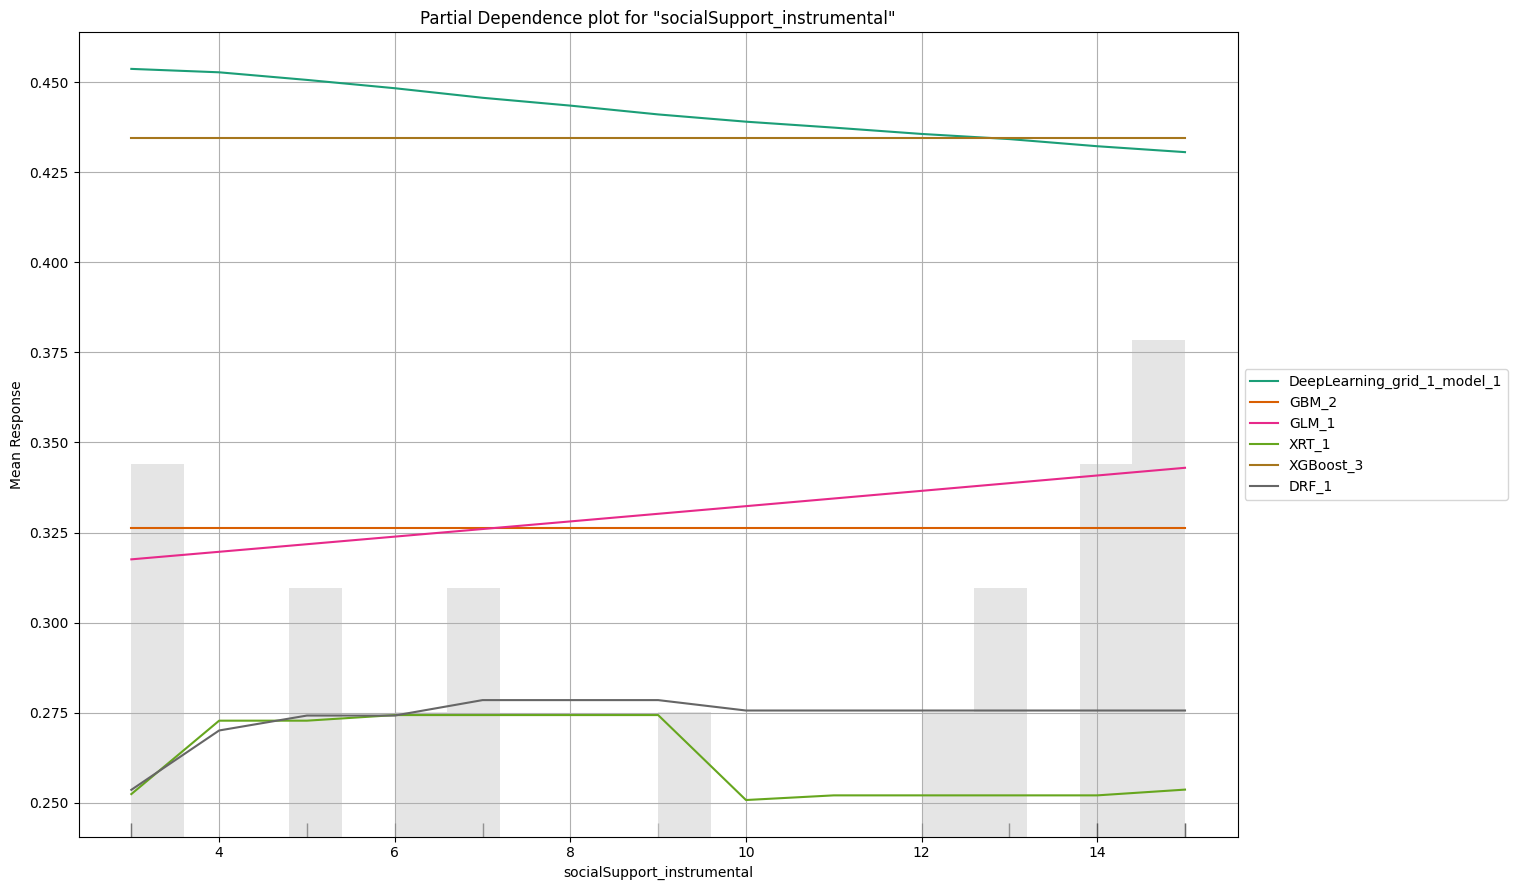

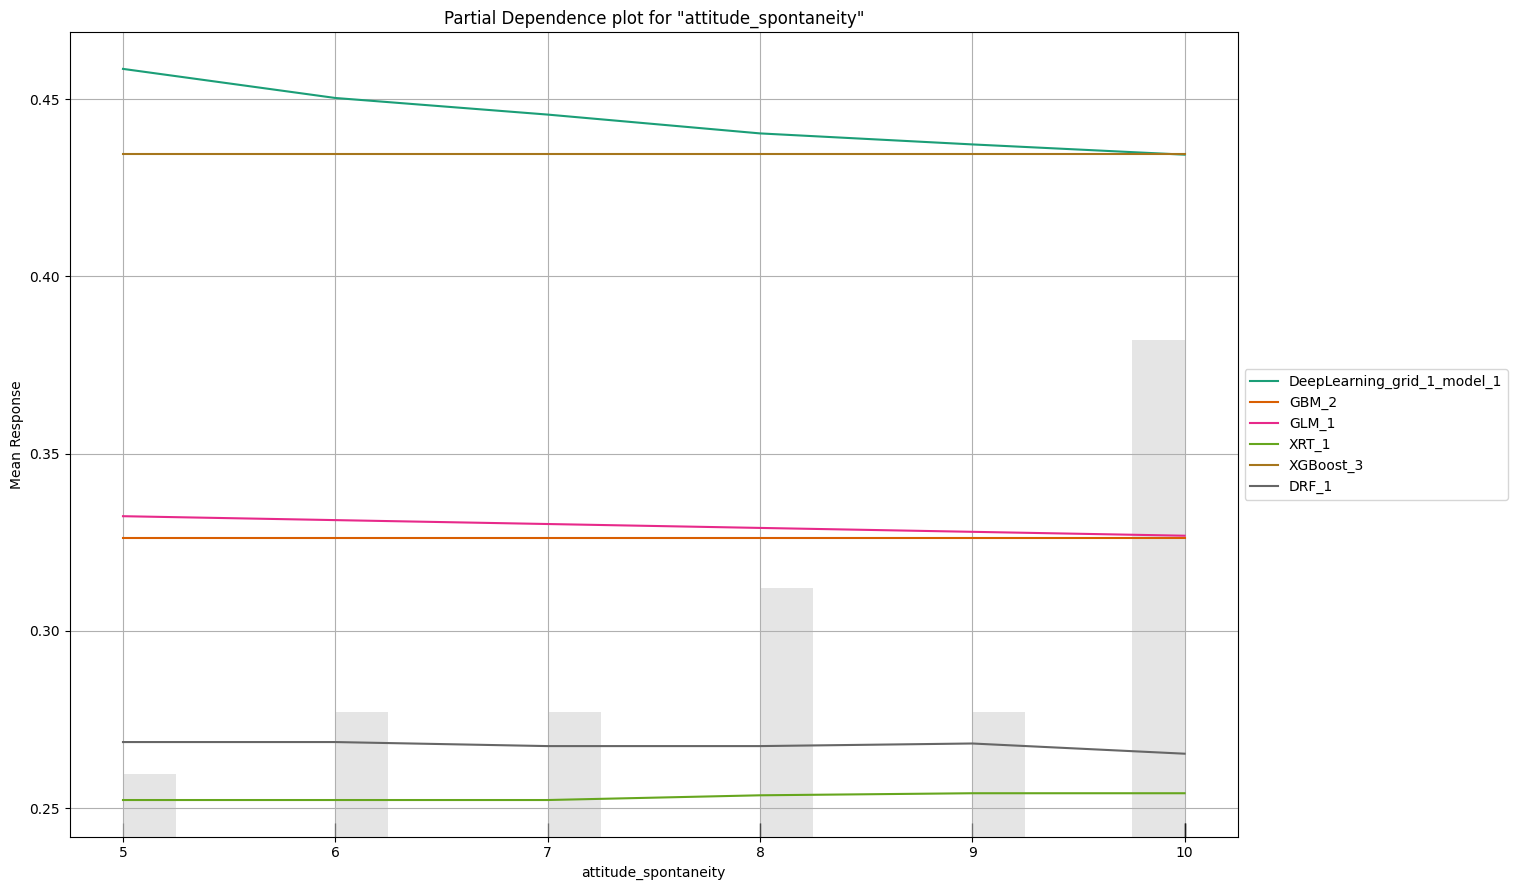

In [182]:
exm = aml.explain(test)

# Confusion Matrix

> Confusion matrix shows a predicted class vs an actual class.

## DeepLearning_grid_1_AutoML_4_20241128_194417_model_1

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.8908666733576375
       0    1    Error    Rate
-----  ---  ---  -------  ----------
0      12   1    0.0769   (1.0/13.0)
1      0    6    0        (0.0/6.0)
Total  12   7    0.0526   (1.0/19.0)

# Learning Curve Plot

> Learning curve plot shows the loss function/metric dependent on number of iterations or trees for tree-based algorithms. This plot can be useful for determining whether the model overfits.

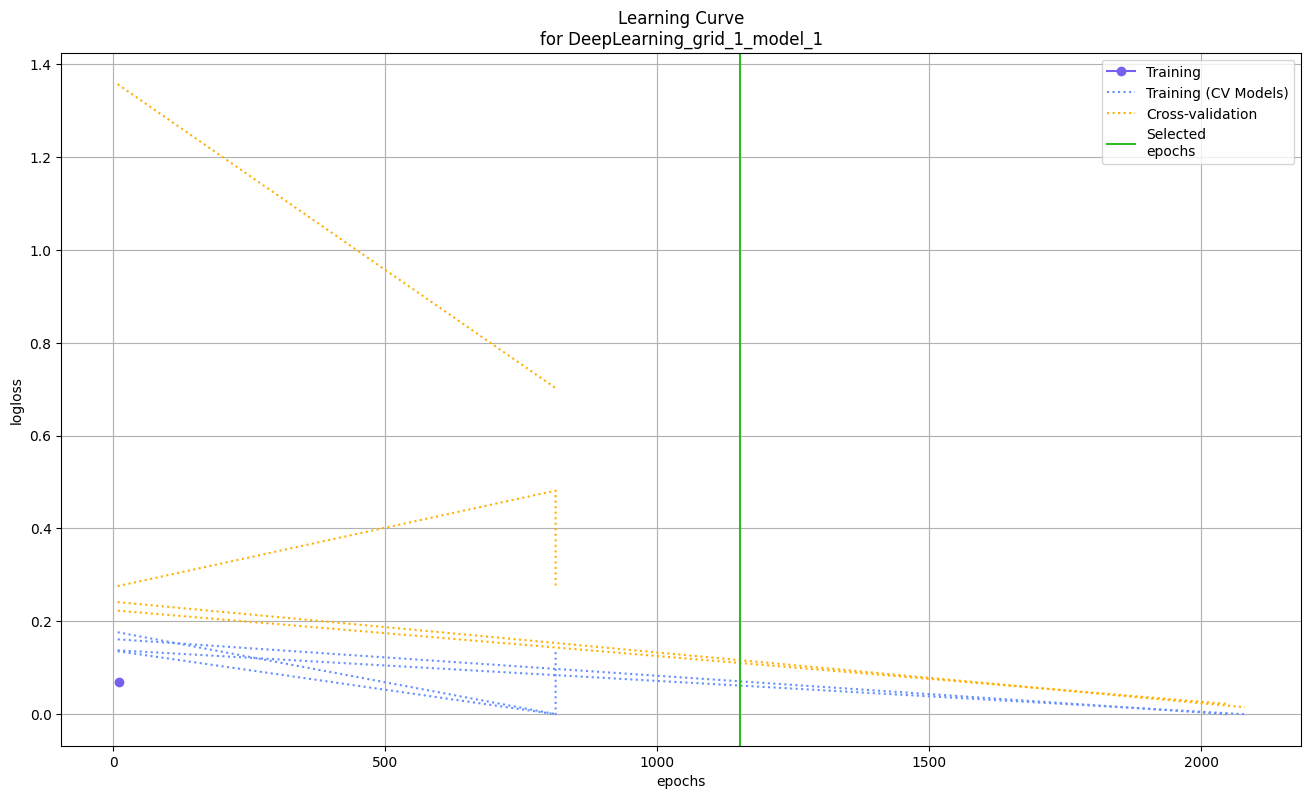

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

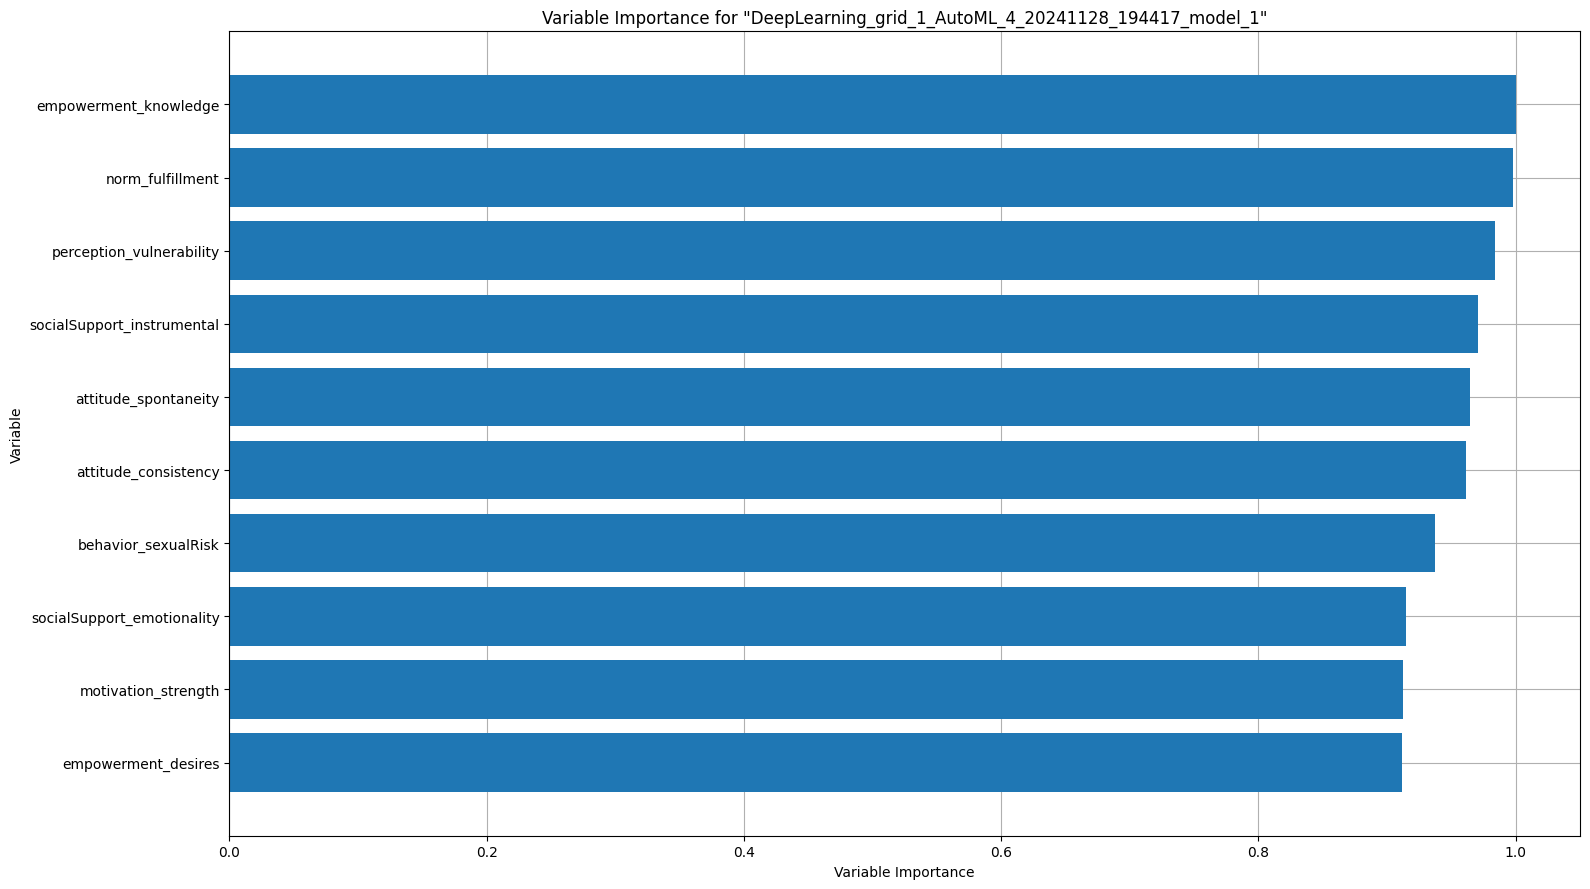

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

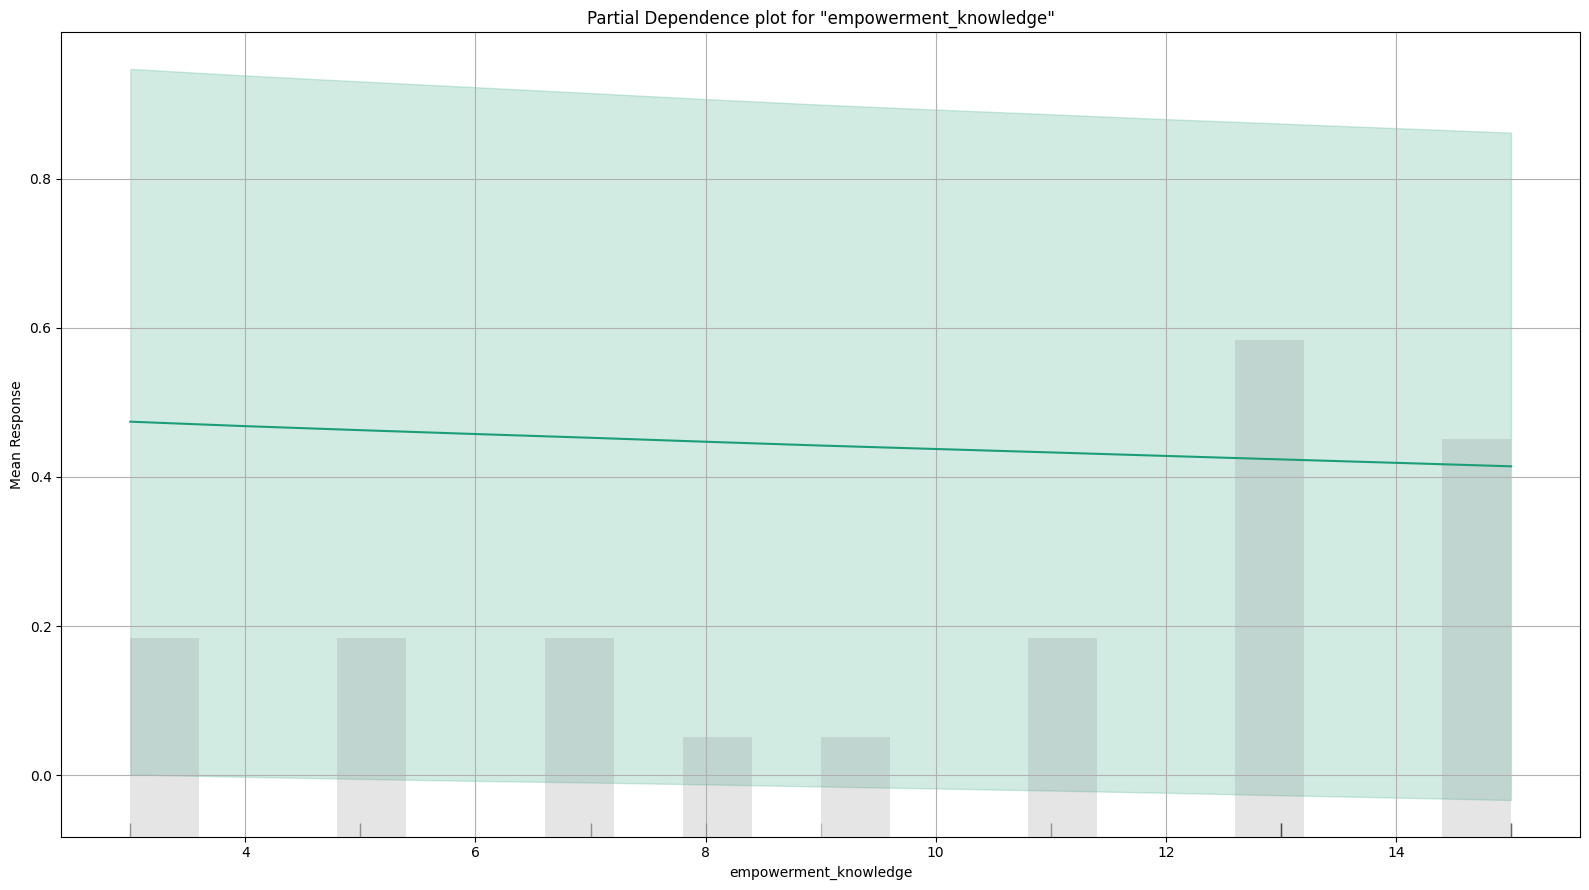

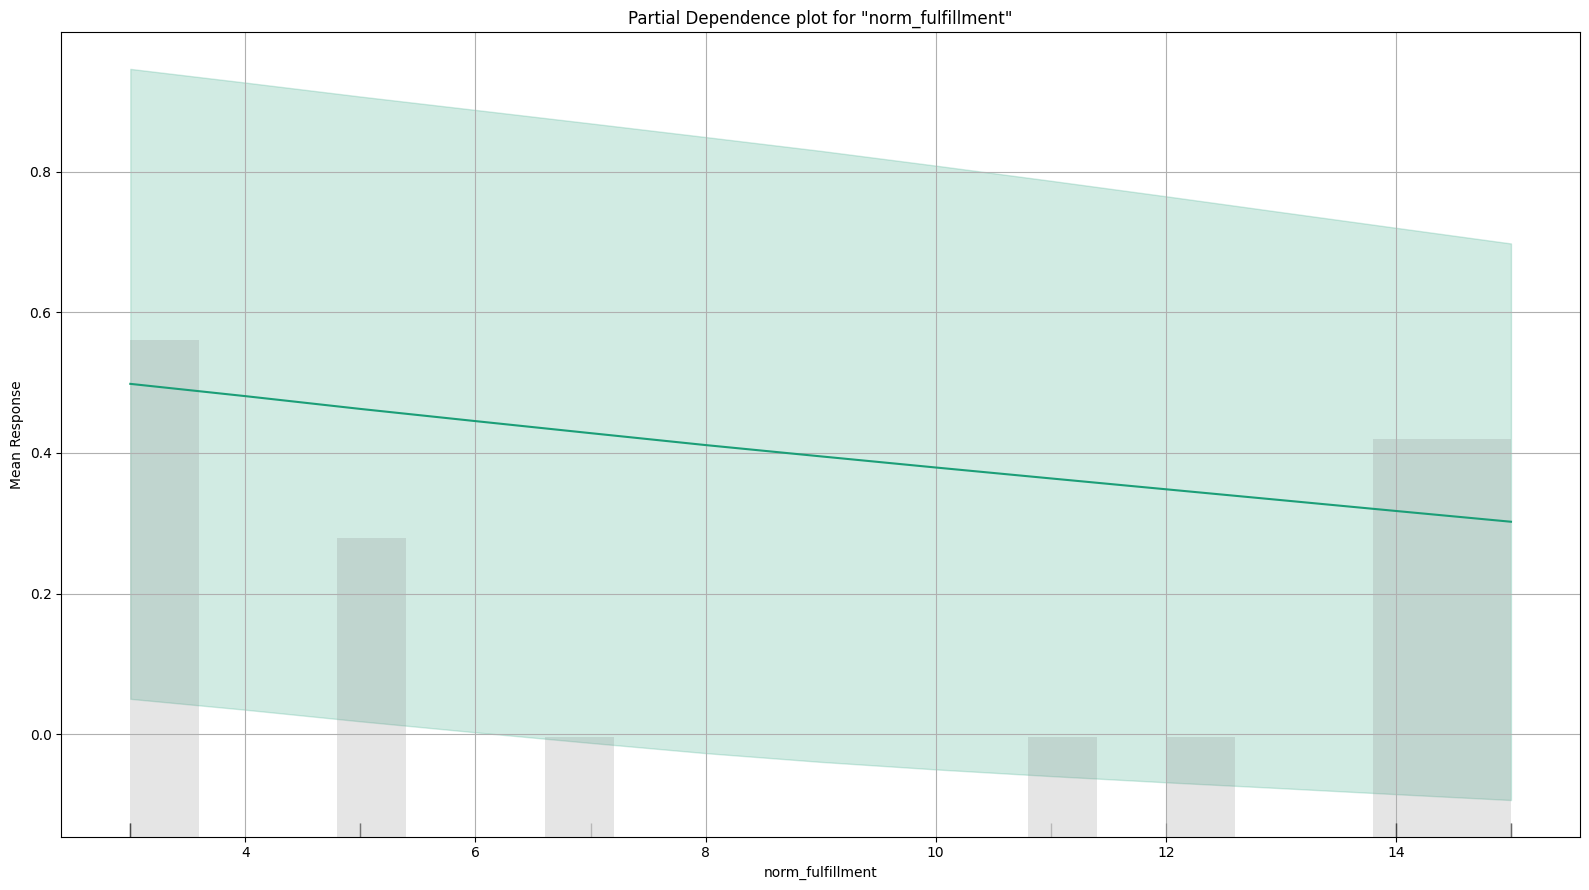

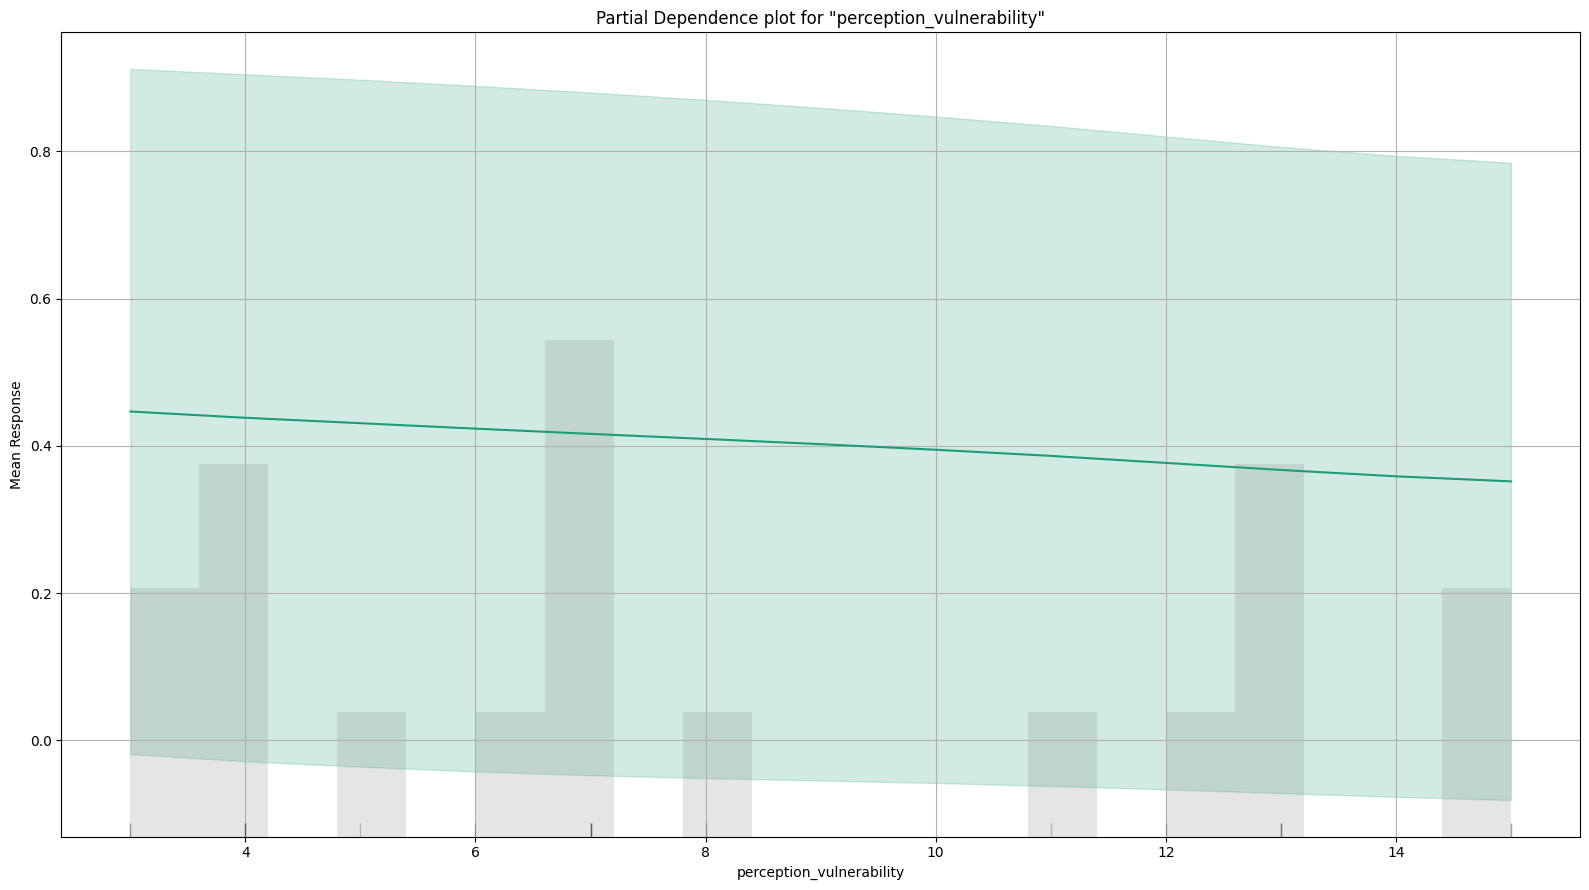

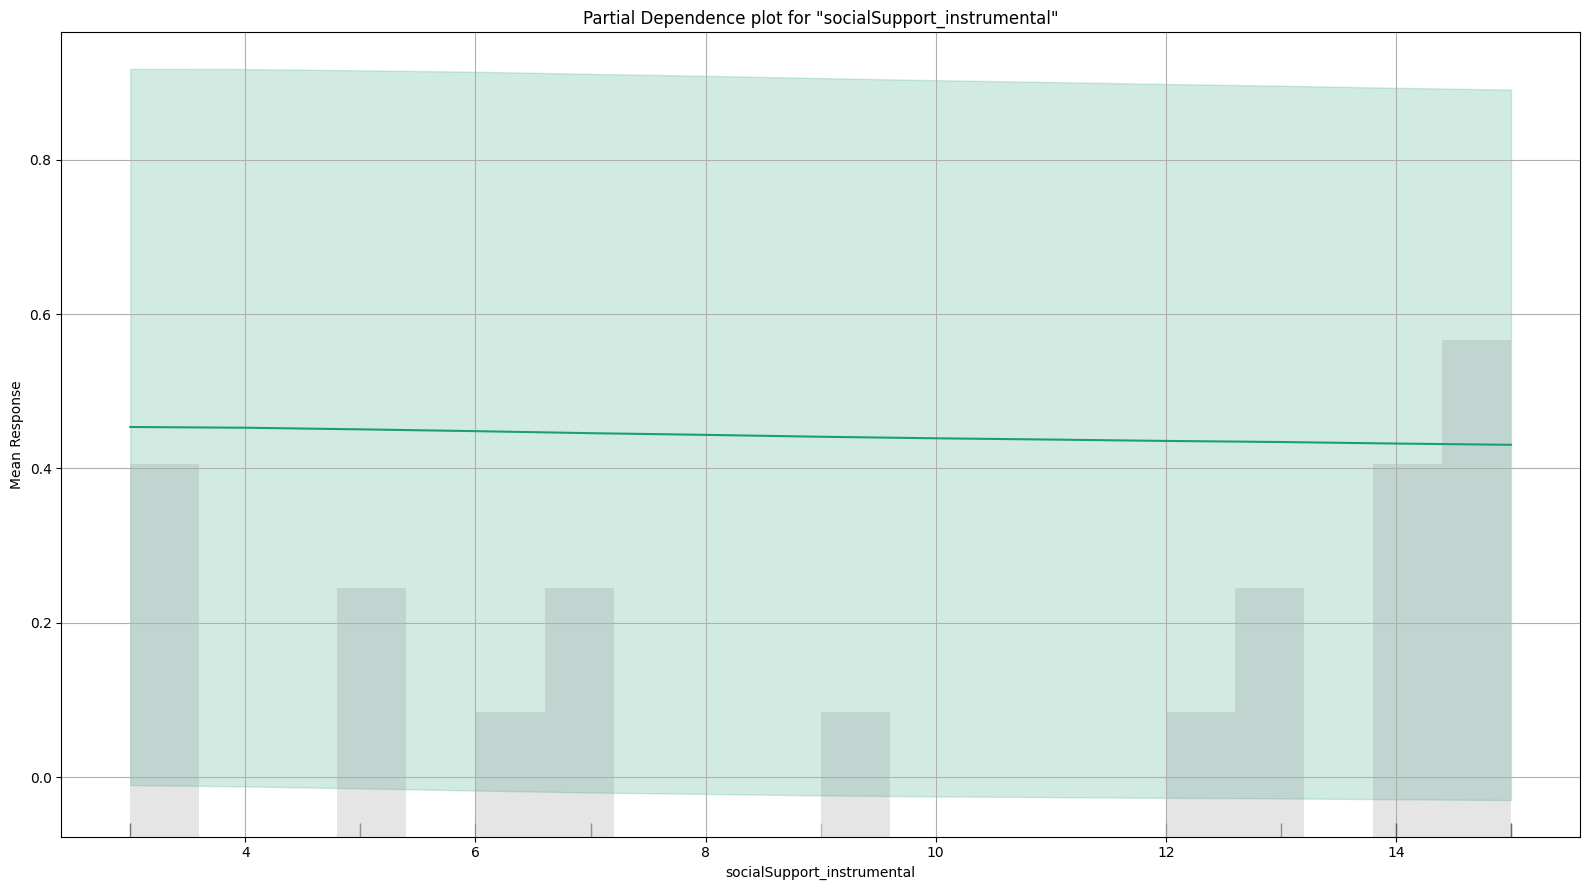

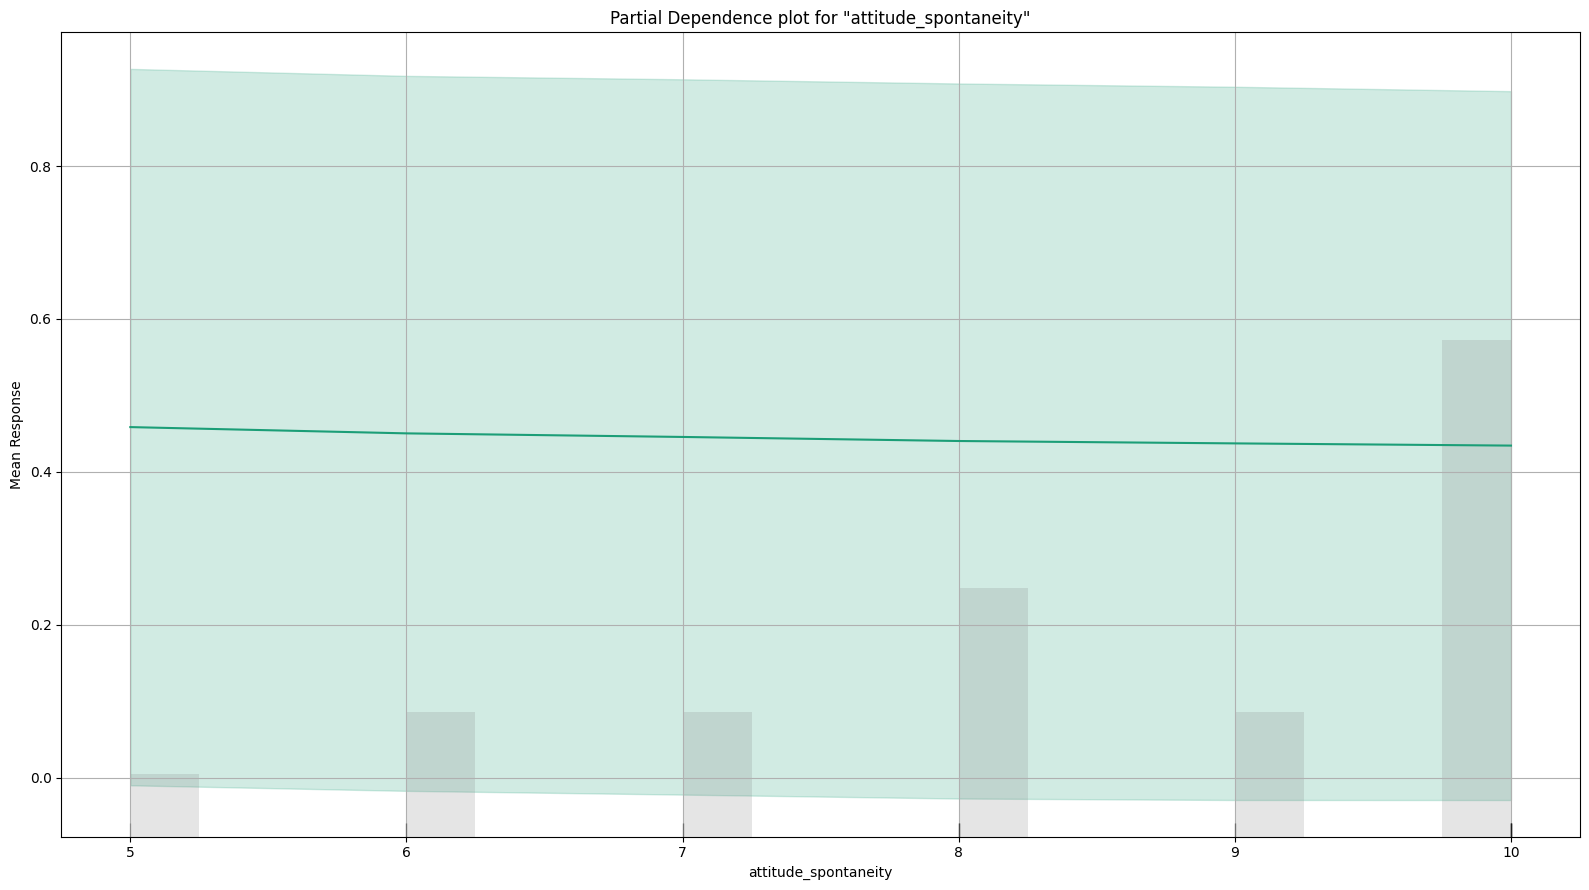

In [183]:
exm = aml.leader.explain(test)

In [184]:
preds = aml.leader.predict(test)

deeplearning prediction progress: |██████████████████████████████████████████████| (done) 100%


In [185]:
df = test.cbind(preds)

df

behavior_sexualRisk    behavior_eating    behavior_personalHygine    intention_aggregation    intention_commitment    attitude_consistency    attitude_spontaneity    norm_significantPerson    norm_fulfillment    perception_vulnerability    perception_severity    motivation_strength    motivation_willingness    socialSupport_emotionality    socialSupport_appreciation    socialSupport_instrumental    empowerment_knowledge    empowerment_abilities    empowerment_desires    ca_cervix    predict           p0        p1
---------------------  -----------------  -------------------------  -----------------------  ----------------------  ----------------------  ----------------------  ------------------------  ------------------  --------------------------  ---------------------  ---------------------  ------------------------  ----------------------------  ----------------------------  ----------------------------  -----------------------  -----------------------  ---------------------  -----------  ---------  -----------  --------
                   10                 11                         11                       10                      14                       7                       7                         5                   5                           4                      2                     15                        13                             7                             6                             5                        5                        4                      4            1          0  0.0518809    0.948119
                   10                 14                          8                        6                      15                       8                      10                         1                   3                           4                      2                     14                         8                             7                             2                             7                       13                        9                      6            1          1  0.0154125    0.984588
                    7                 15                          7                       10                      14                       7                       9                         1                   3                           8                      2                      4                         3                             7                             9                            13                        8                        3                      9            1          1  7.85837e-07  0.999999
                   10                 15                          8                        9                      15                       7                      10                         1                   3                           7                      2                     15                         3                             3                             6                            13                        7                        5                      9            1          0  0.109133     0.890867
                   10                 15                         12                       10                      15                       6                      10                         1                   3                           3                      2                      4                         3                             3                             2                            15                       13                        6                     11            1          1  9.66724e-05  0.999903
                   10                 15                          9                        7                       6                       8                       8                         1                  12                           5                      4                      5                         4                             3               

In [186]:
df = h2o.as_list(df)

/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


In [187]:
preds = df[['ca_cervix', 'predict']]
preds

/usr/local/lib/python3.10/dist-packages/google/colab/_interactive_table_hint_button.py:178: FutureWarning: Index.format is deprecated and will be removed in a future version. Convert using index.astype(str) or index.map(formatter) instead.
  df_html=dataframe._repr_html_(),  # pylint: disable=protected-access
/usr/local/lib/python3.10/dist-packages/google/colab/_interactive_table_hint_button.py:178: FutureWarning: RangeIndex.format is deprecated and will be removed in a future version. Convert using index.astype(str) or index.map(formatter) instead.
  df_html=dataframe._repr_html_(),  # pylint: disable=protected-access


ca_cervix  predict
0           1        0
1           1        1
2           1        1
3           1        0
4           1        1
5           1        1
6           0        0
7           0        0
8           0        0
9           0        0
10          0        0
11          0        0
12          0        0
13          0        0
14          0        0
15          0        0
16          0        0
17          0        0
18          0        0

In [188]:
!pip install lime
import lime
import lime.lime_tabular

In [189]:
feature_names = train.columns[0: -1]
feature_names

['behavior_sexualRisk',
 'behavior_eating',
 'behavior_personalHygine',
 'intention_aggregation',
 'intention_commitment',
 'attitude_consistency',
 'attitude_spontaneity',
 'norm_significantPerson',
 'norm_fulfillment',
 'perception_vulnerability',
 'perception_severity',
 'motivation_strength',
 'motivation_willingness',
 'socialSupport_emotionality',
 'socialSupport_appreciation',
 'socialSupport_instrumental',
 'empowerment_knowledge',
 'empowerment_abilities',
 'empowerment_desires']

In [190]:
train_features_numpy = train[feature_names].as_data_frame().values
train_features_numpy

/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


array([[10, 13, 12, ..., 12, 11,  8],
       [10, 15,  3, ...,  3,  3, 15],
       [10, 11, 10, ...,  4,  4,  4],
       ...,
       [10, 14, 14, ..., 12, 11,  9],
       [10, 12, 15, ..., 15, 11, 14],
       [10,  8, 11, ..., 12, 10, 10]])

In [191]:
explainer = lime.lime_tabular.LimeTabularExplainer(train_features_numpy,
                                                   feature_names = feature_names,
                                                   mode='classification')

In [192]:
def findPrediction(instance):
    #instance will be in type of numpy
    df = pd.DataFrame(data = instance, columns = feature_names)
    hf = h2o.H2OFrame(df)
    predictions = aml.leader.predict(hf).as_data_frame()
    predictions = predictions.iloc[:,1:].values
    return predictions

In [193]:
train

behavior_sexualRisk    behavior_eating    behavior_personalHygine    intention_aggregation    intention_commitment    attitude_consistency    attitude_spontaneity    norm_significantPerson    norm_fulfillment    perception_vulnerability    perception_severity    motivation_strength    motivation_willingness    socialSupport_emotionality    socialSupport_appreciation    socialSupport_instrumental    empowerment_knowledge    empowerment_abilities    empowerment_desires    ca_cervix
---------------------  -----------------  -------------------------  -----------------------  ----------------------  ----------------------  ----------------------  ------------------------  ------------------  --------------------------  ---------------------  ---------------------  ------------------------  ----------------------------  ----------------------------  ----------------------------  -----------------------  -----------------------  ---------------------  -----------
                   10                 13                         12                        4                       7                       9                      10                         1                   8                           7                      3                     14                         8                             5                             7                            12                       12                       11                      8            1
                   10                 15                          3                        2                      14                       8                      10                         1                   4                           7                      2                      7                         3                             3                             6                            11                        3                        3                     15            1
                   10                 11                         10                       10                      15                       7                       7                         1                   5                           4                      2                     15                        13                             7                             4                             4                        4                        4                      4            1
                    8                 11                          7                        8                      10                       7                       8                         1                   5                           3                      2                     15                         5                             3                             6                            12                        5                        4                      7            1
                   10                 15                          4                        6                      14                       6                      10                         5                   3                           7                      2                      7                        13                             3                             3                            15                        3                        3                      5            1
                    8                 12                          9                       10                      10                       5                      10                         5                   5                           5                      2                     10                         9                            13                             2                             9                        8                        7                     12            1
                   10                 15                          7                        2              

In [194]:
test

behavior_sexualRisk    behavior_eating    behavior_personalHygine    intention_aggregation    intention_commitment    attitude_consistency    attitude_spontaneity    norm_significantPerson    norm_fulfillment    perception_vulnerability    perception_severity    motivation_strength    motivation_willingness    socialSupport_emotionality    socialSupport_appreciation    socialSupport_instrumental    empowerment_knowledge    empowerment_abilities    empowerment_desires    ca_cervix
---------------------  -----------------  -------------------------  -----------------------  ----------------------  ----------------------  ----------------------  ------------------------  ------------------  --------------------------  ---------------------  ---------------------  ------------------------  ----------------------------  ----------------------------  ----------------------------  -----------------------  -----------------------  ---------------------  -----------
                   10                 11                         11                       10                      14                       7                       7                         5                   5                           4                      2                     15                        13                             7                             6                             5                        5                        4                      4            1
                   10                 14                          8                        6                      15                       8                      10                         1                   3                           4                      2                     14                         8                             7                             2                             7                       13                        9                      6            1
                    7                 15                          7                       10                      14                       7                       9                         1                   3                           8                      2                      4                         3                             7                             9                            13                        8                        3                      9            1
                   10                 15                          8                        9                      15                       7                      10                         1                   3                           7                      2                     15                         3                             3                             6                            13                        7                        5                      9            1
                   10                 15                         12                       10                      15                       6                      10                         1                   3                           3                      2                      4                         3                             3                             2                            15                       13                        6                     11            1
                   10                 15                          9                        7                       6                       8                       8                         1                  12                           5                      4                      5                         4                             3                             3                             5                        7                        7                      3            1
                   10                 14                         10                        9              

In [195]:
idx = 10
test_df = test.as_data_frame()
test_numpy = test_df.iloc[idx].values[0:-1]

/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


In [196]:
print(test_df.shape)

(19, 20)


In [197]:
test_numpy

array([10, 15, 14, 10, 11, 10,  8,  5, 11, 15, 10, 15, 15, 15, 10, 15, 15,
       15, 15])

In [198]:
exp = explainer.explain_instance(test_numpy,
                                 findPrediction,
                                 num_features = len(feature_names))
exp

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
deeplearning prediction progress: |██████████████████████████████████████████████| (done) 100%


/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


In [199]:
exp.show_in_notebook(show_table=True, show_all=True)

In [200]:
exp.save_to_file('lime11.html')

In [201]:
idx = 12
test_df = test.as_data_frame()
test_numpy = test_df.iloc[idx].values[0:-1]

exp = explainer.explain_instance(test_numpy,
                                 findPrediction,
                                 num_features = len(feature_names))

exp.show_in_notebook(show_table=True, show_all=True)

/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
deeplearning prediction progress: |██████████████████████████████████████████████| (done) 100%


/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


In [202]:
exp.save_to_file('lime12.html')

In [203]:
idx = 15
test_df = test.as_data_frame()
test_numpy = test_df.iloc[idx].values[0:-1]

exp = explainer.explain_instance(test_numpy,
                                 findPrediction,
                                 num_features = len(feature_names))

exp.show_in_notebook(show_table=True, show_all=True)

/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
deeplearning prediction progress: |██████████████████████████████████████████████| (done) 100%


/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


In [204]:
exp.save_to_file('lime13.html')